In [23]:
import sys, json, string
import os.path as op
import pandas as pd
from nilearn import image, plotting, datasets
from glob import glob
sys.path.append('/home/grg/git/alfa')
from roistats import collect, plotting
%matplotlib inline

# Collecting diffusion parameters over every region from the JHU white-matter atlas

In [25]:
types = ['MD', 'L1', 'RD', 'FA']

for t in types:
    print 'Collecting %s'%t
    # Define paths to images and atlas
    maps_fp = sorted(glob('/home/grg/TBSS/AMYLOID/amylstaging/split_images/%s/*nii.gz'%t))
    subjects = [string.atoi(op.basename(e).split('_')[0]) for e in maps_fp]
    atlas_name = 'ICBM-labels-1mm'
    jhu = datasets.fetch_atlas_JHU(atlas_name)
    atlas_fp = jhu['maps']

    # Collect values
    labels = dict([(i+1,j) for i,j in enumerate(jhu['labels'][2:])])
    data = collect.roistats_from_maps(maps_fp, atlas_fp, subjects, labels)
    
    # Write Excel and json
    fp = '/tmp/amylstaging_%s_TBSS_roivalues_%s.xls'%(atlas_name, t)
    data.to_excel(fp)
    j = {'images' : maps_fp, 'atlas' : atlas_fp}
    json.dump(j, open(fp.replace('.xls', '.json'), 'w'))

[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  1.2min
[Parallel(n_jobs=7)]: Done 114 out of 114 | elapsed:  3.4min finished


[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  1.2min
[Parallel(n_jobs=7)]: Done 114 out of 114 | elapsed:  2.9min finished


[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   37.2s
[Parallel(n_jobs=7)]: Done 114 out of 114 | elapsed:  2.6min finished


[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   46.8s
[Parallel(n_jobs=7)]: Done 114 out of 114 | elapsed:  1.8min finished


# Plotting DWI in relation to centiloids and ApoE

### Mean diffusivity

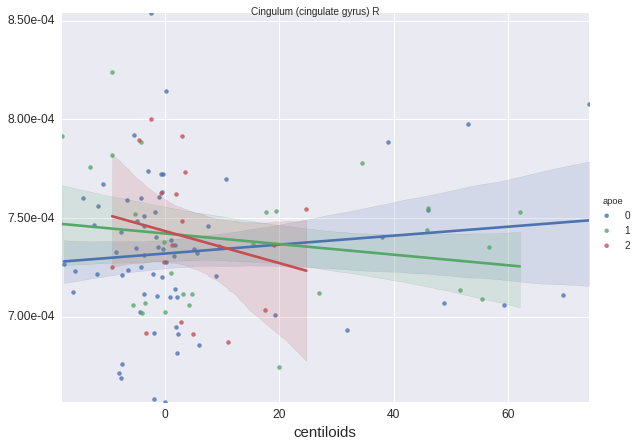

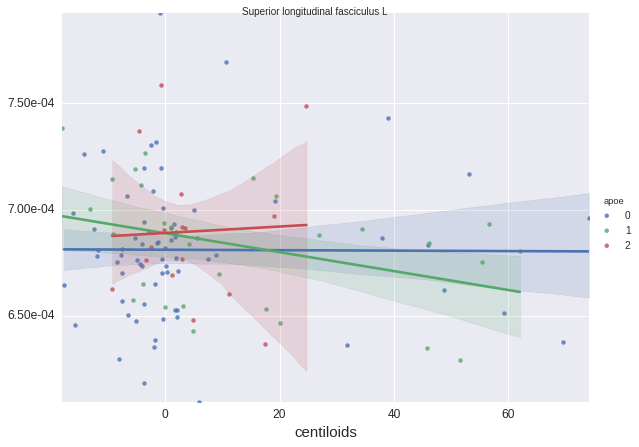

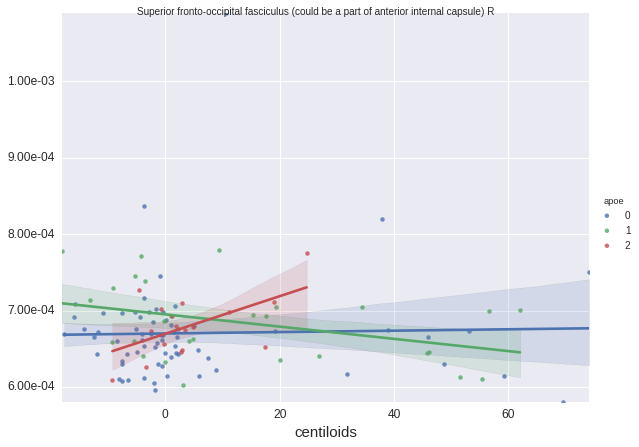

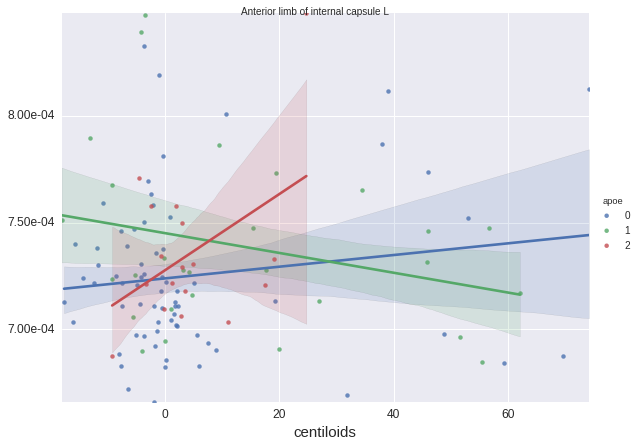

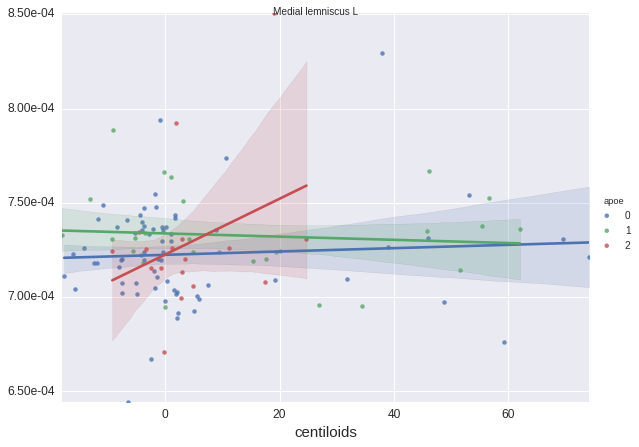

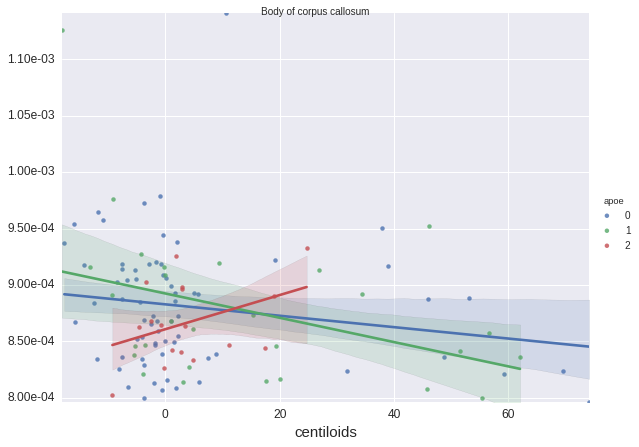

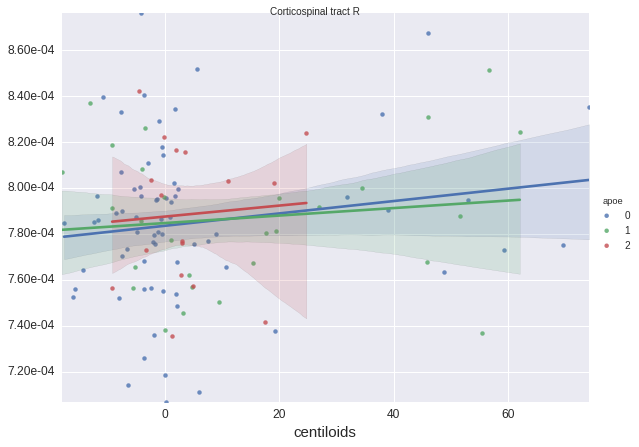

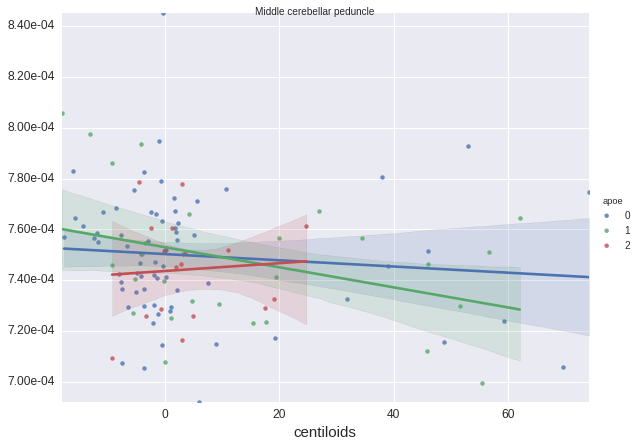

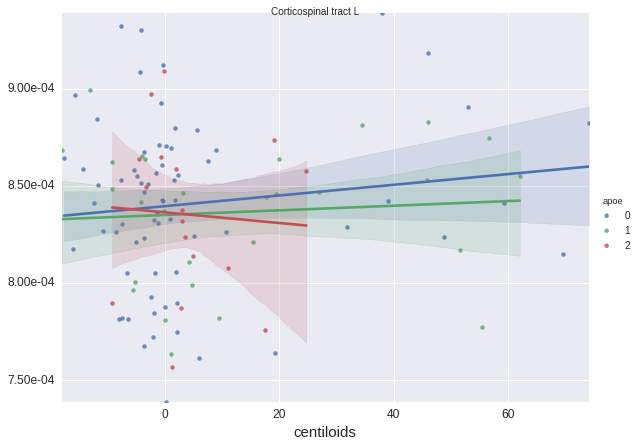

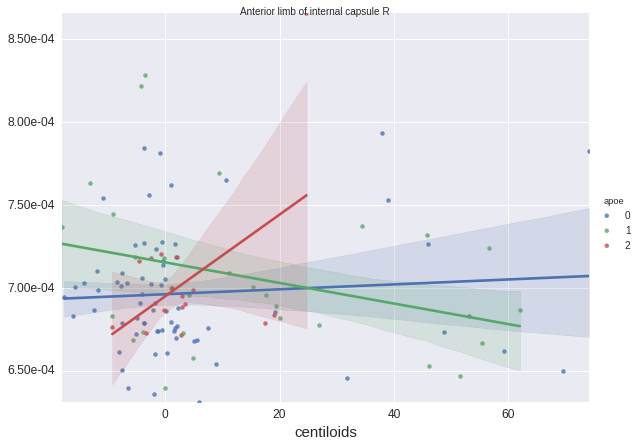

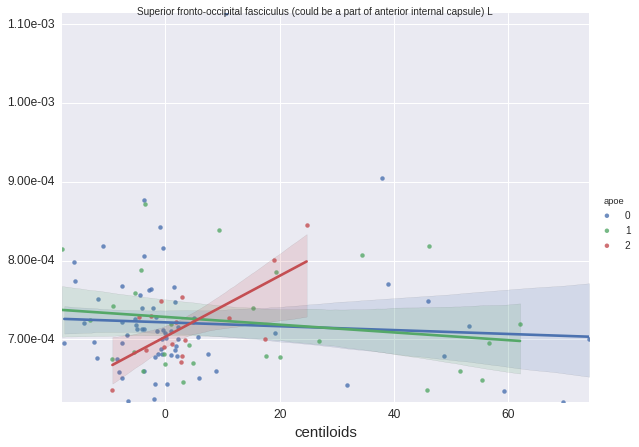

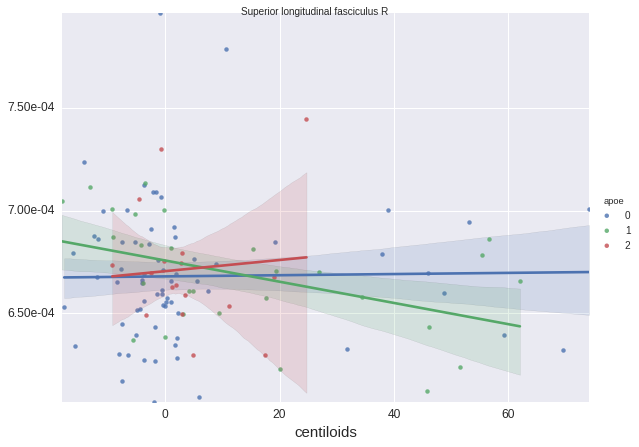

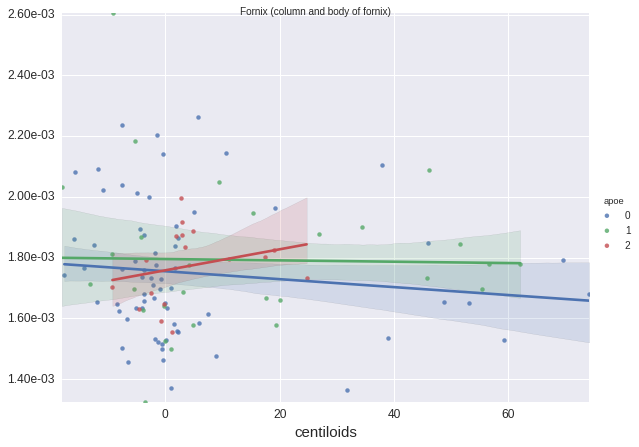

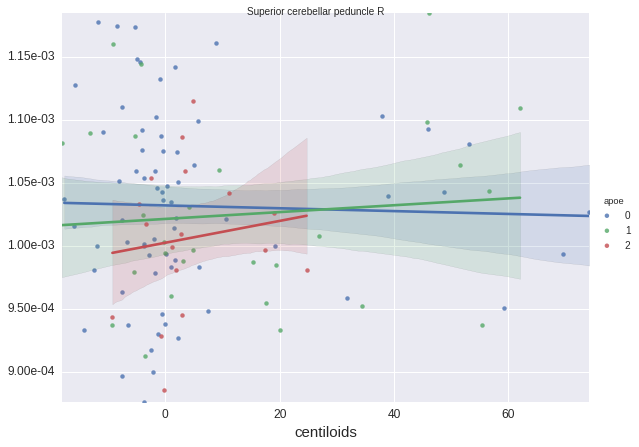

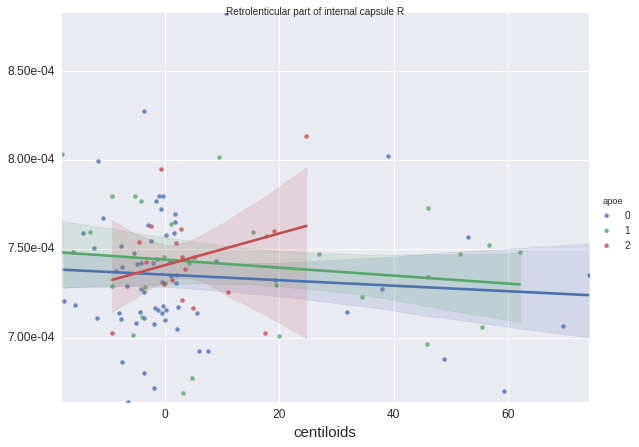

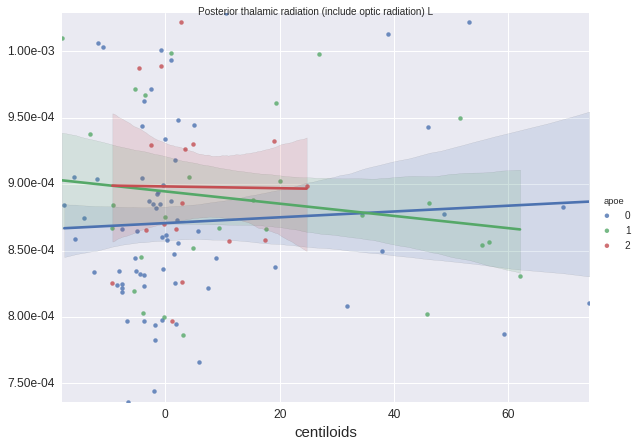

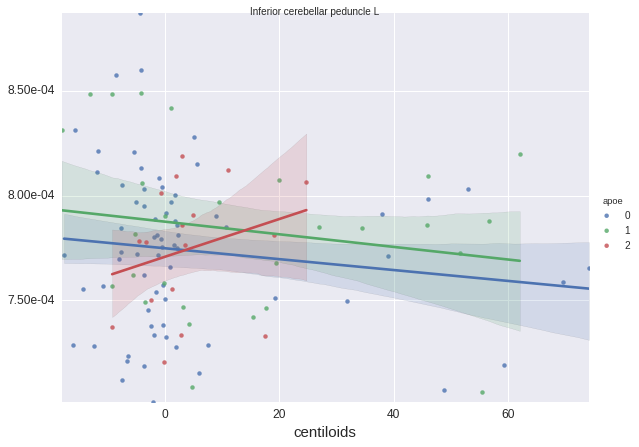

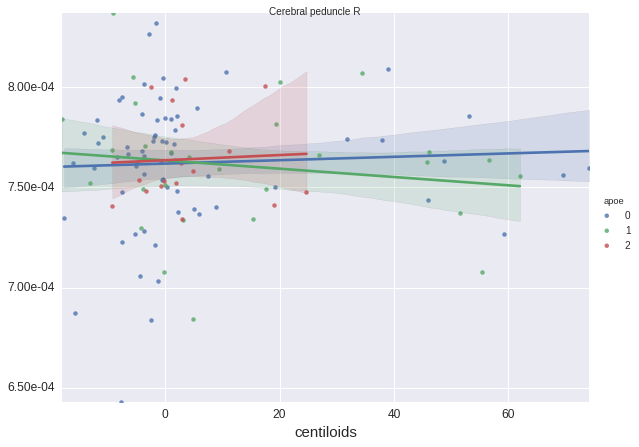

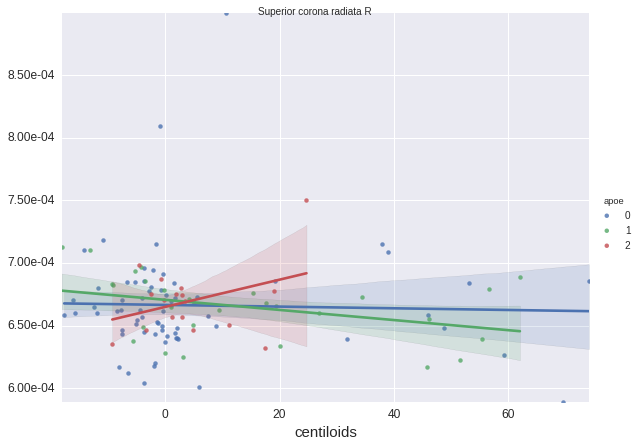

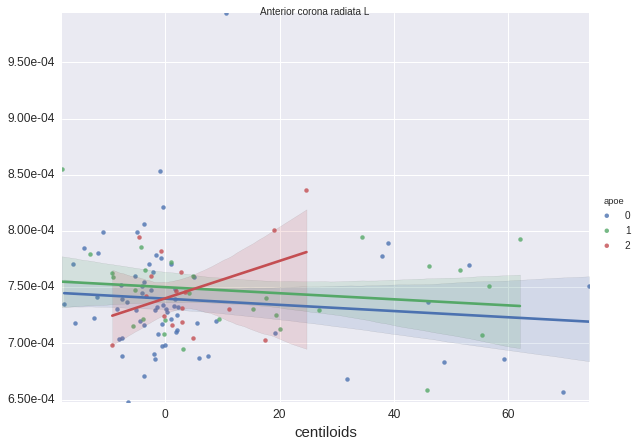

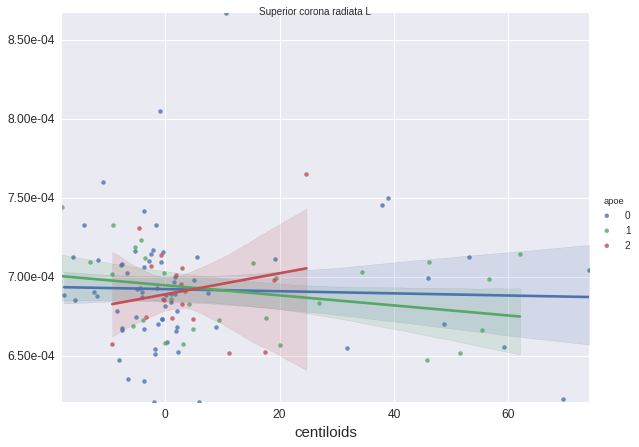

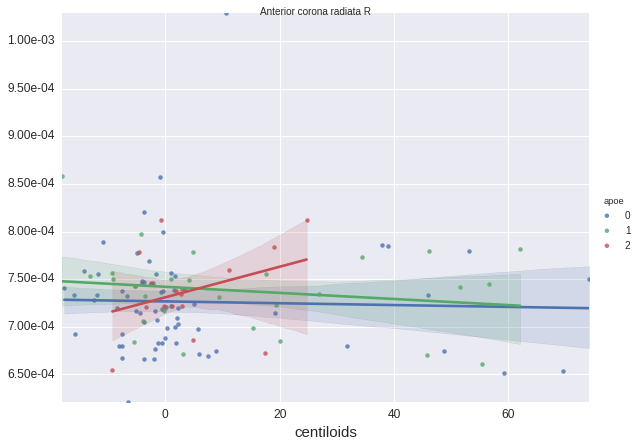

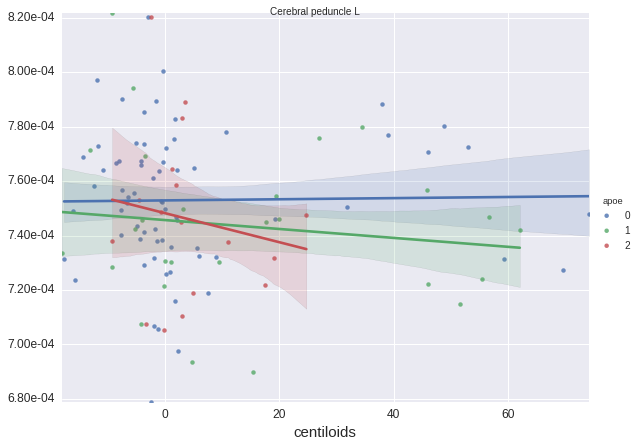

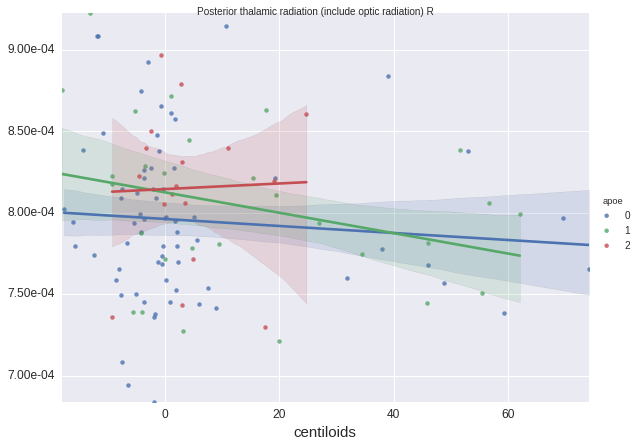

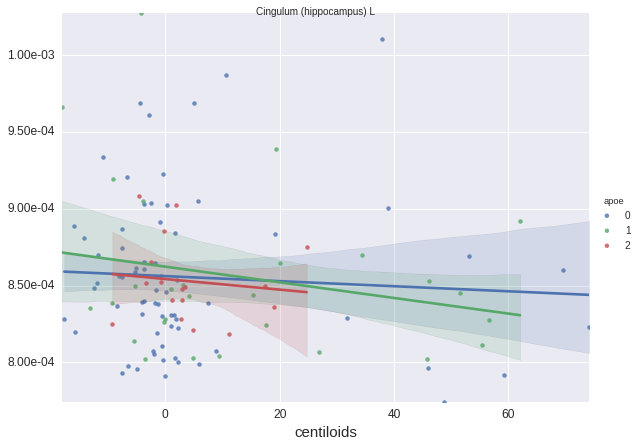

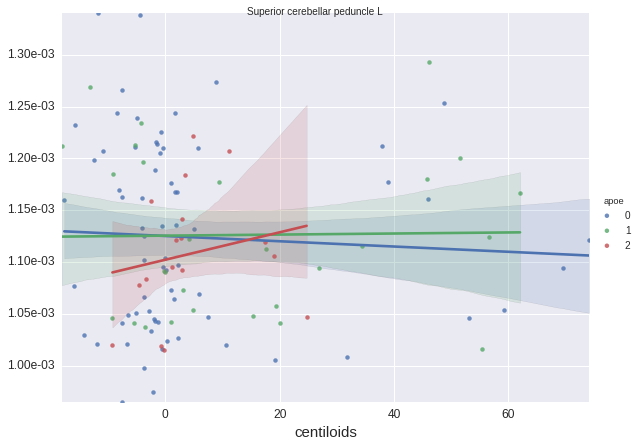

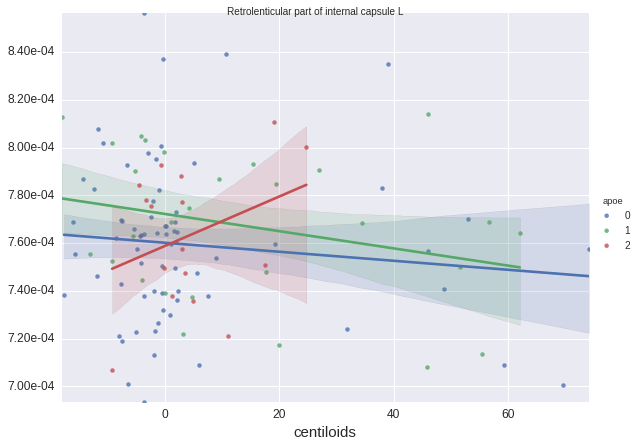

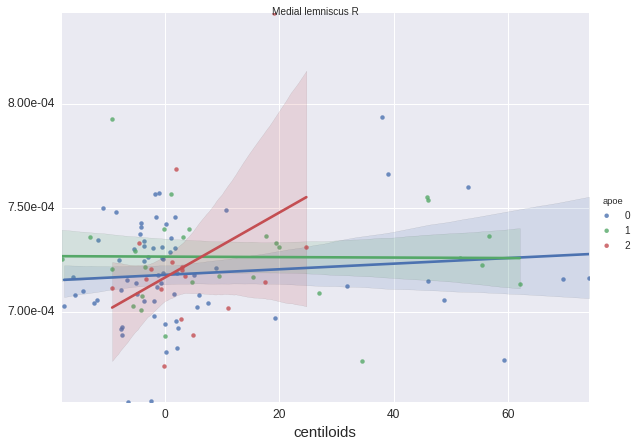

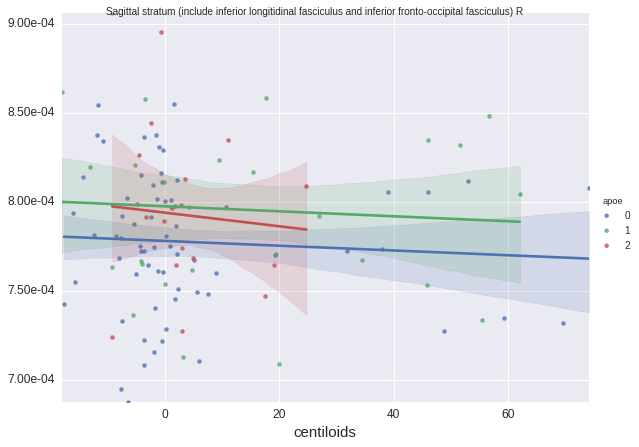

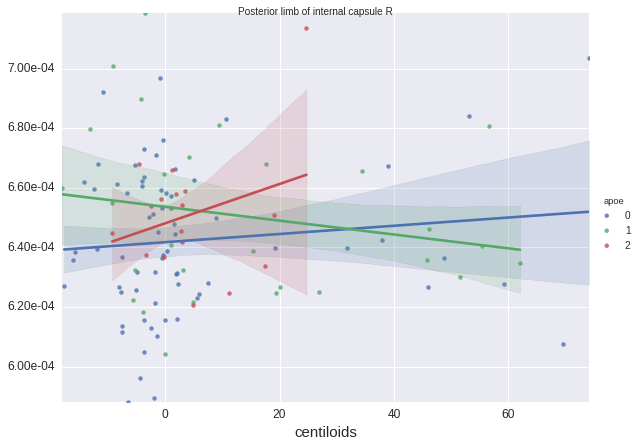

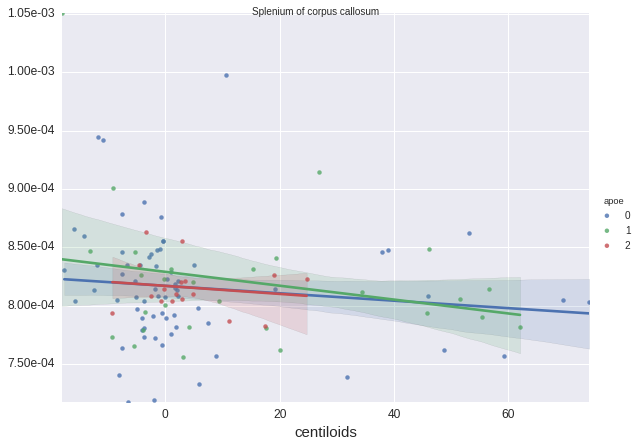

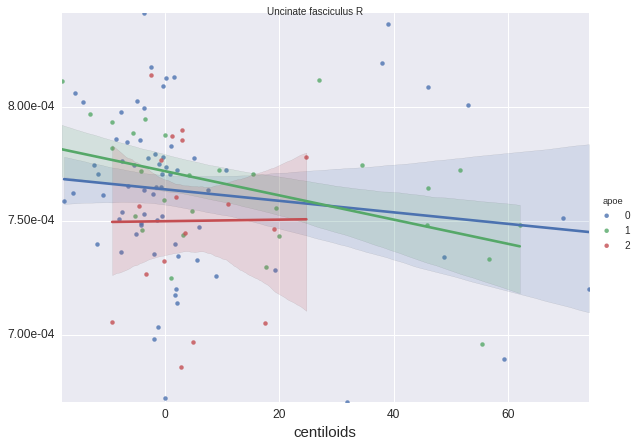

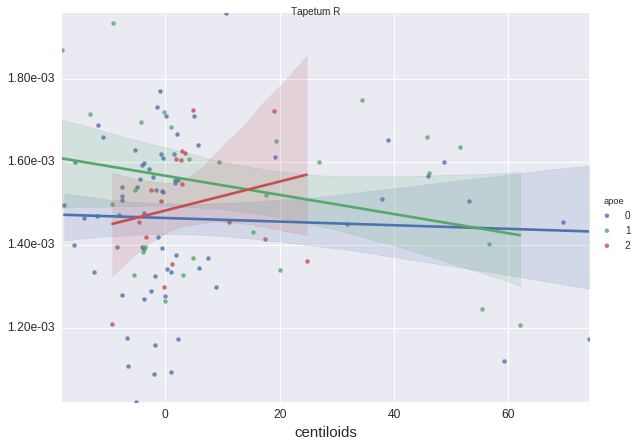

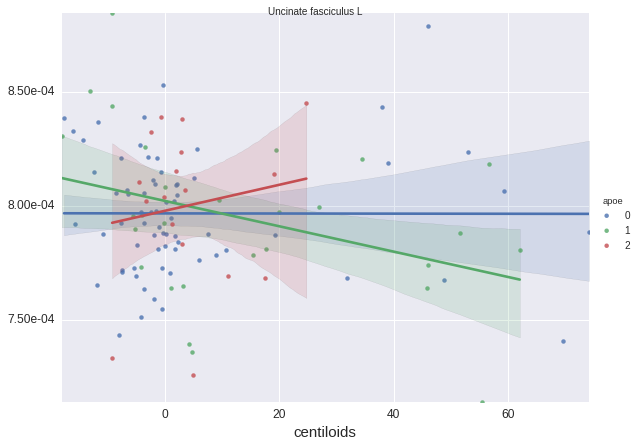

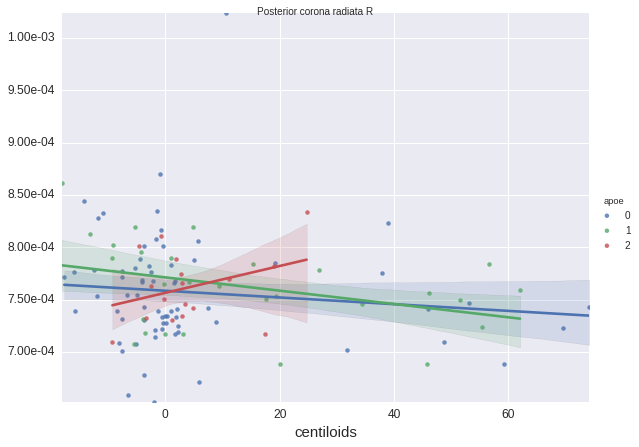

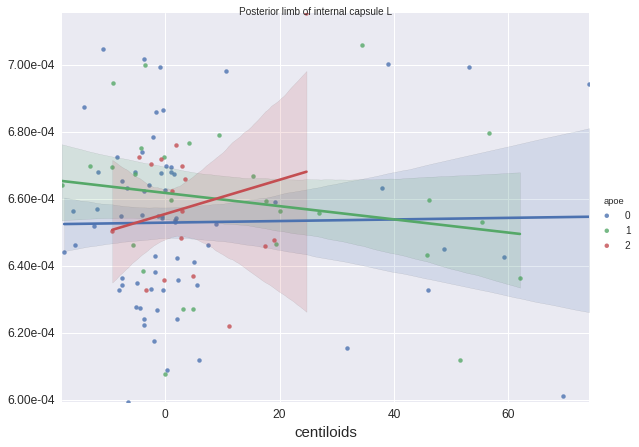

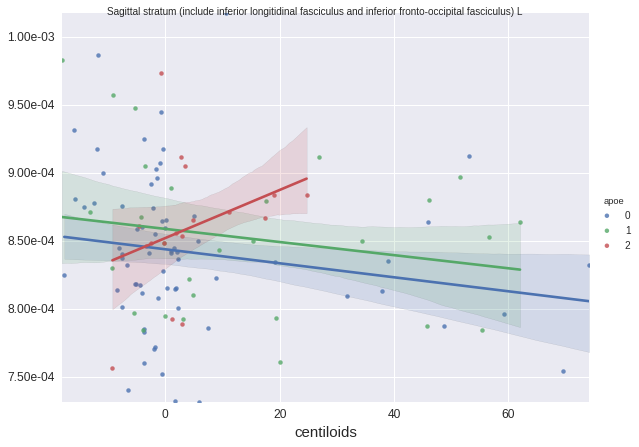

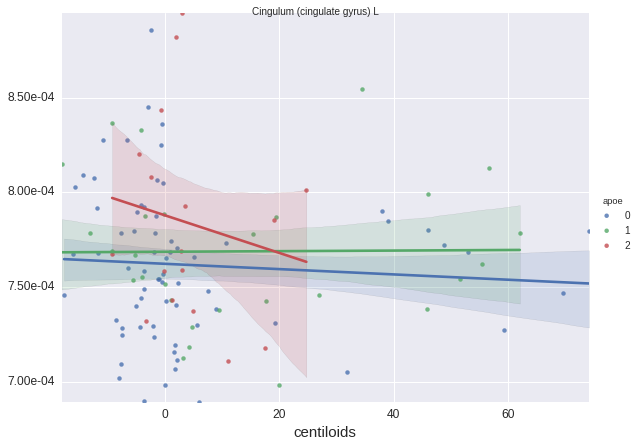

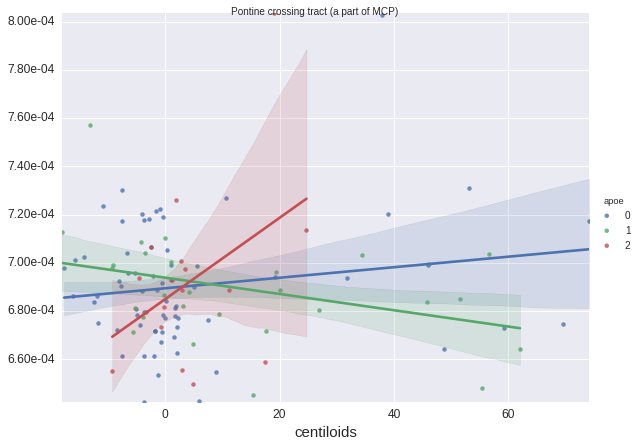

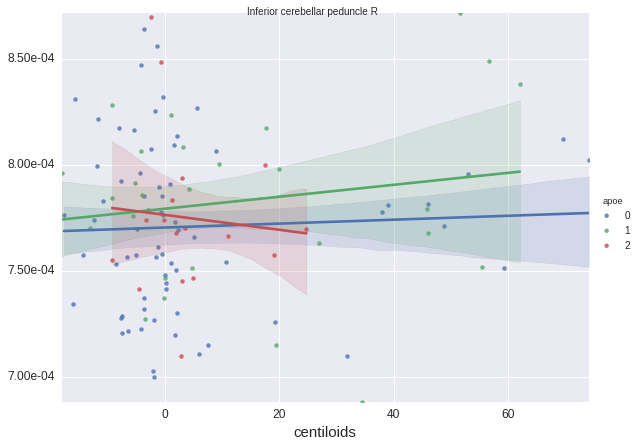

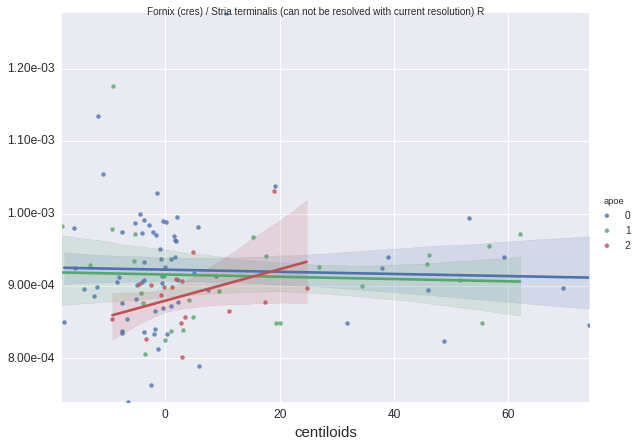

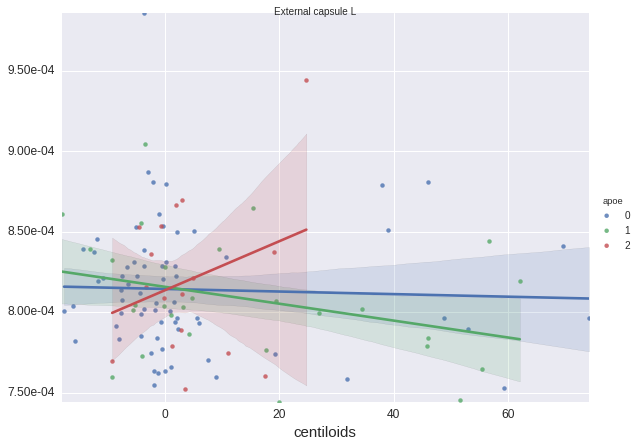

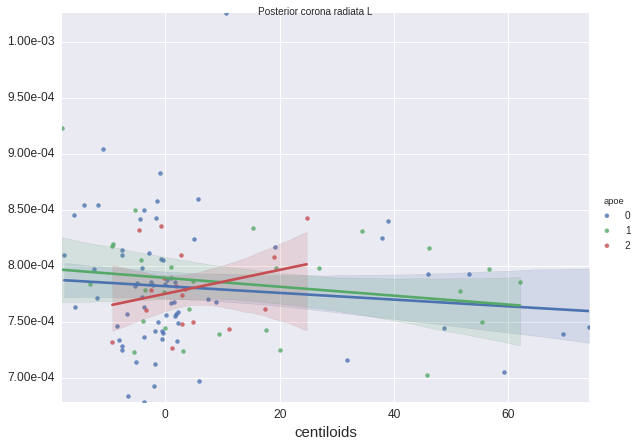

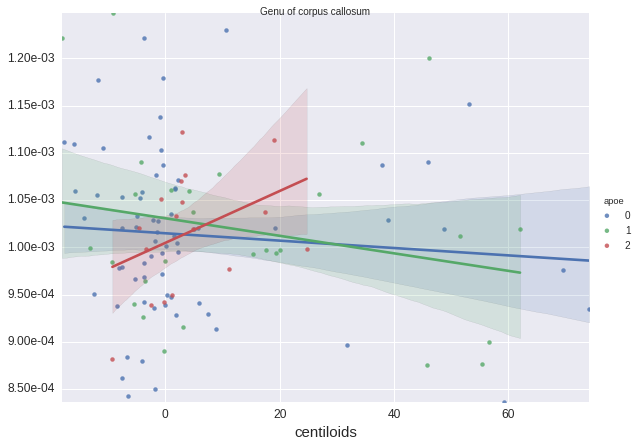

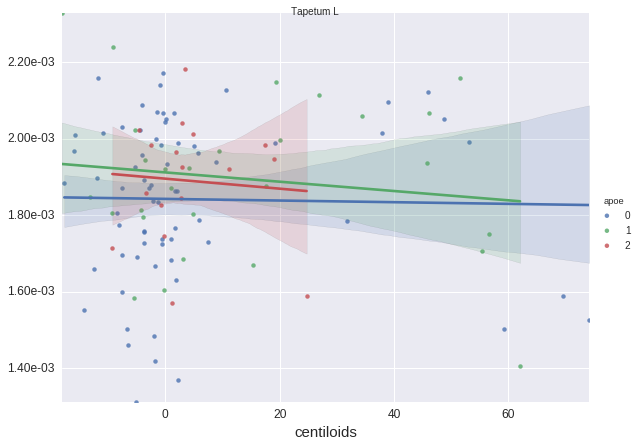

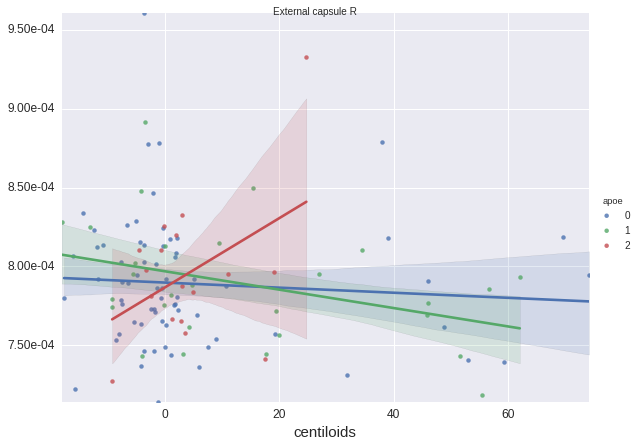

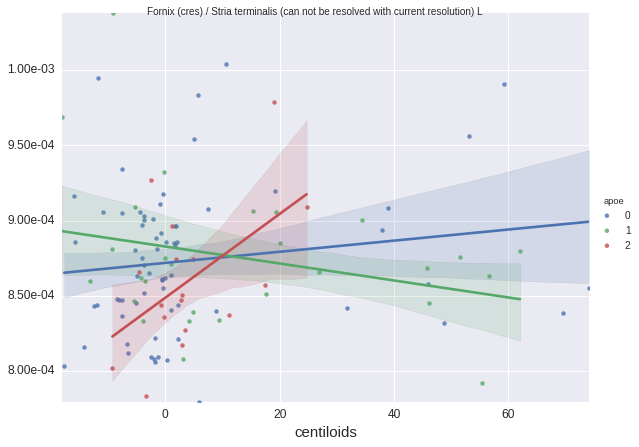

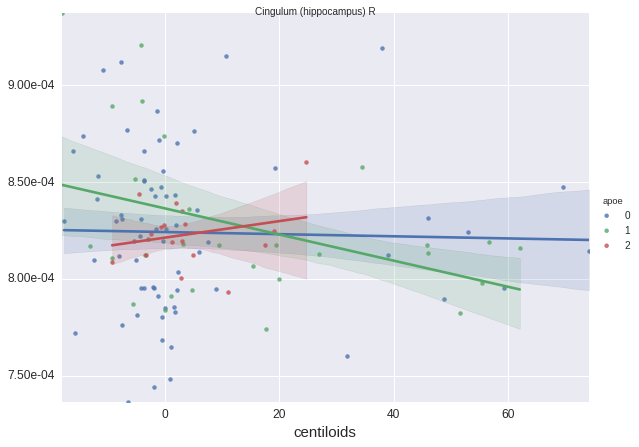

In [20]:
reload(plotting)
data = pd.read_excel('/home/grg/amylstaging_ICBM-labels-1mm_TBSS_roivalues_MD.xls').set_index('subject')
cov = pd.read_excel('/home/grg/SPM/2018/covariates.xlsx').set_index('subject')
data = data.join(cov)

for i, each in enumerate(set(data.columns).difference(set(cov.columns))):
    plotting.lm_plot(each, 'centiloids', data)

### Fractional anisotropy

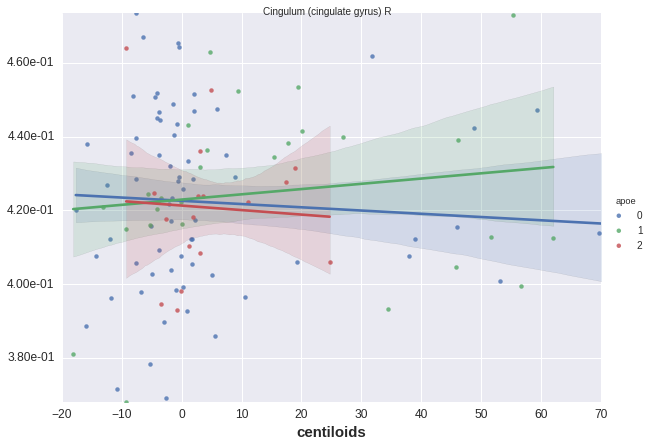

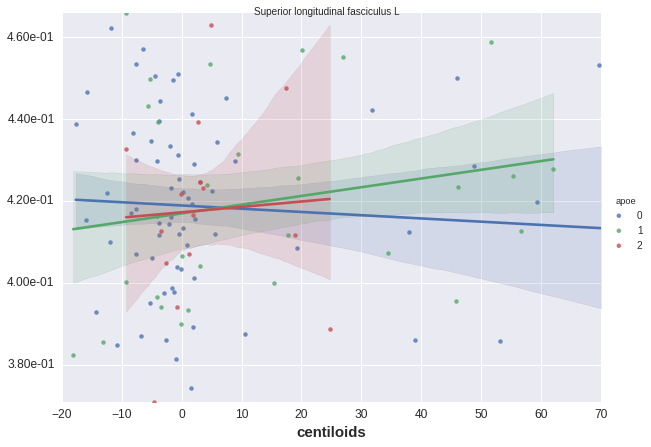

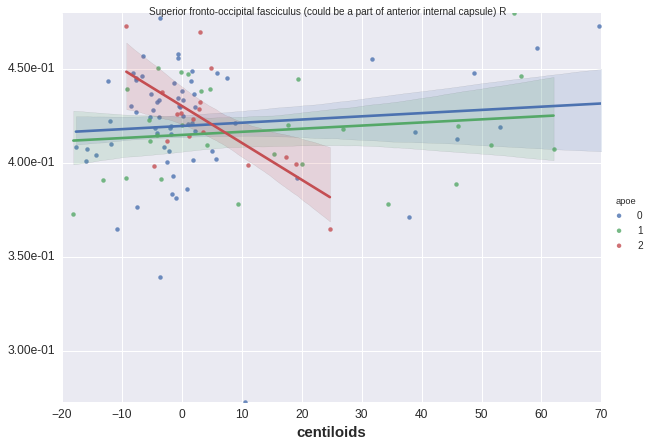

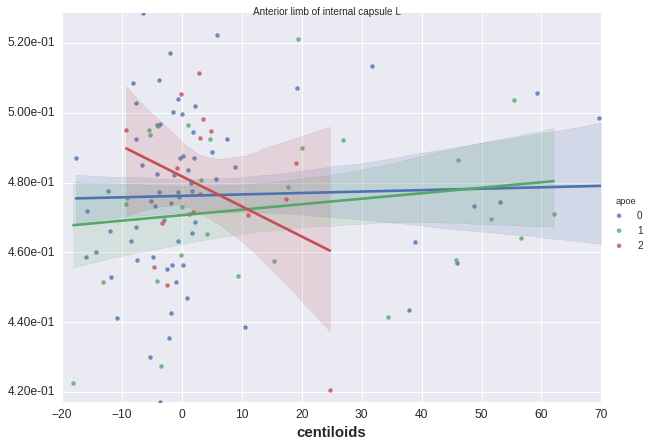

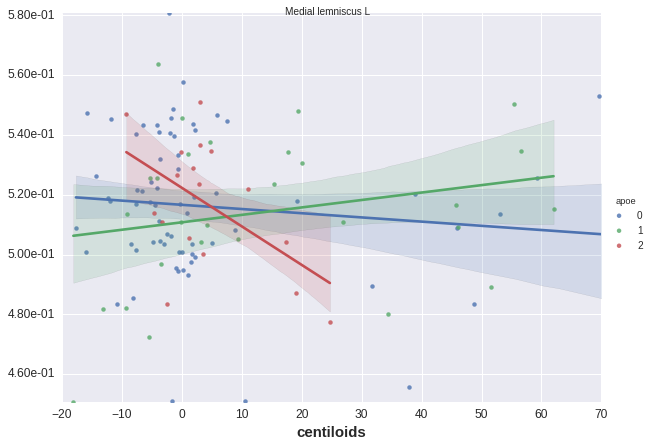

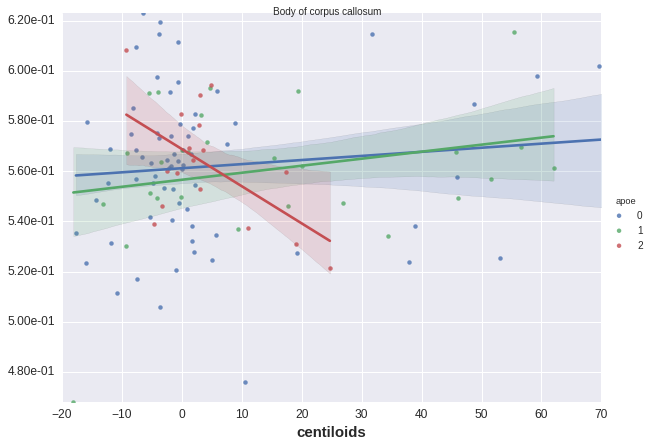

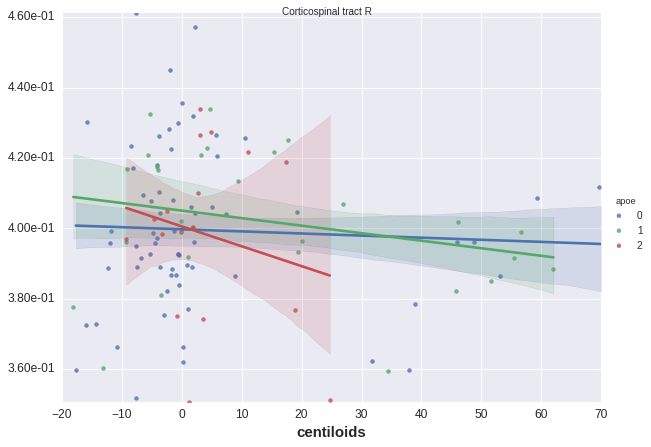

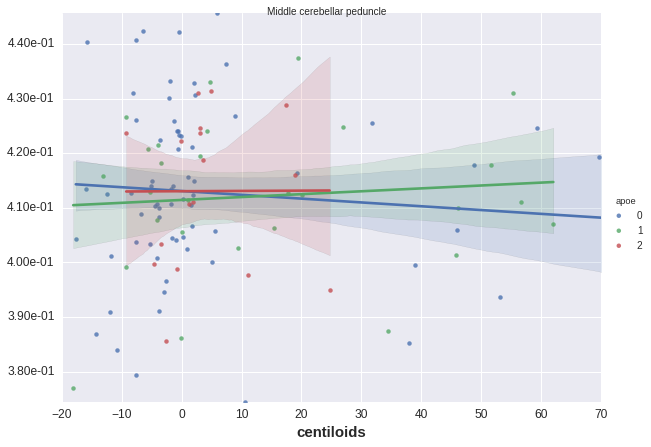

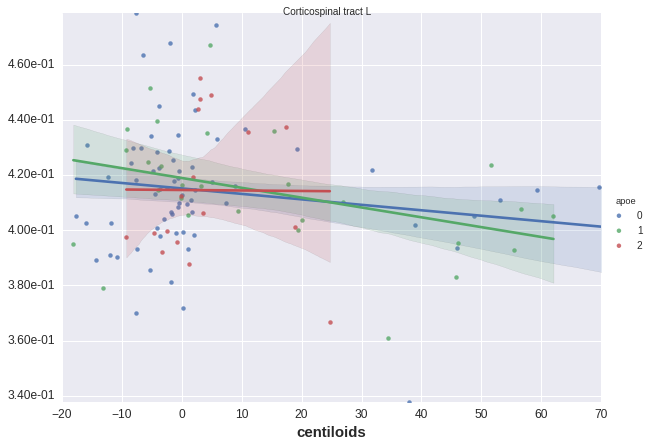

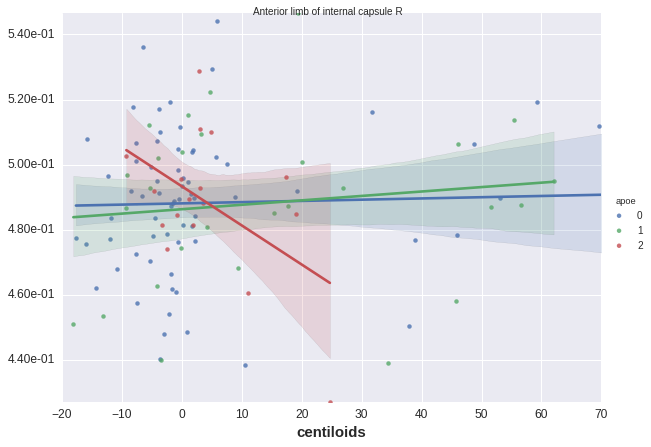

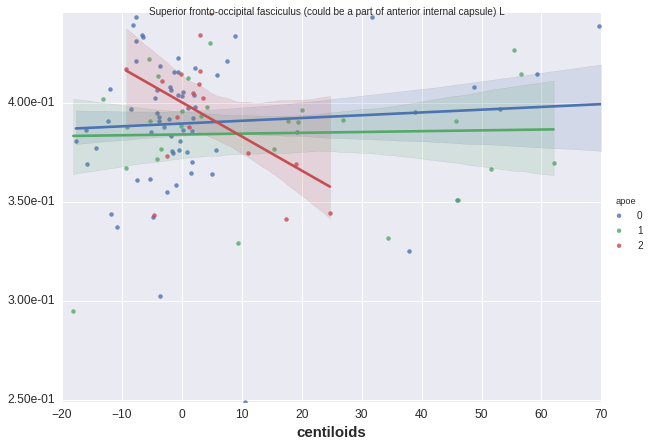

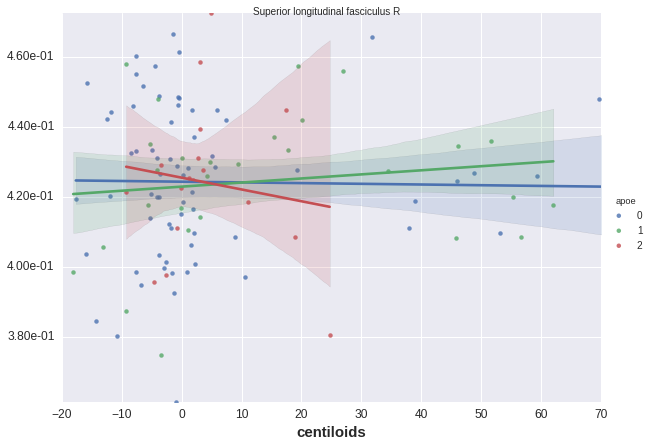

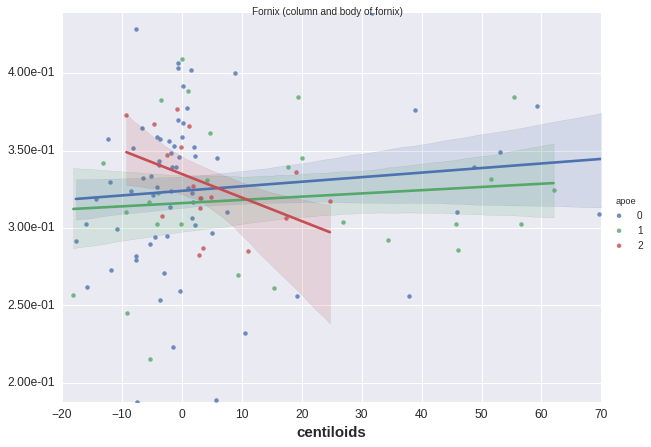

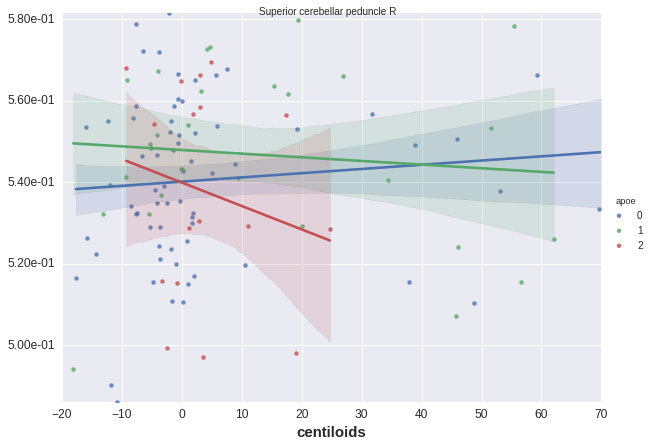

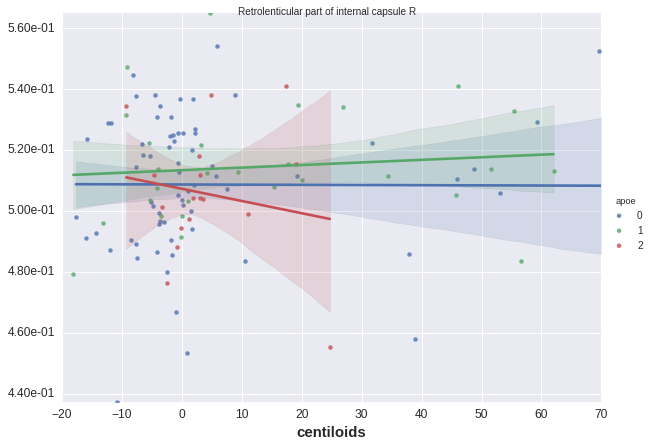

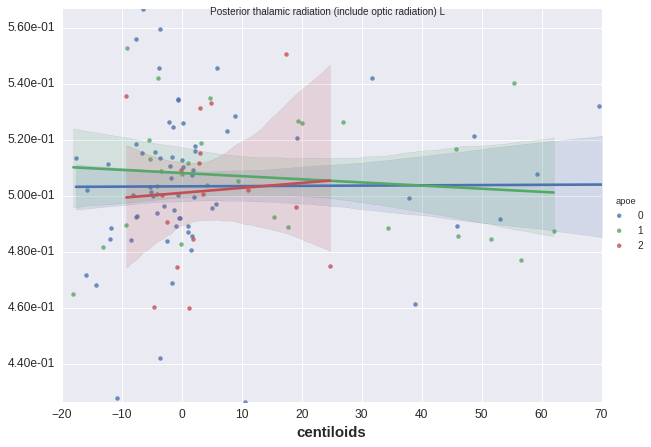

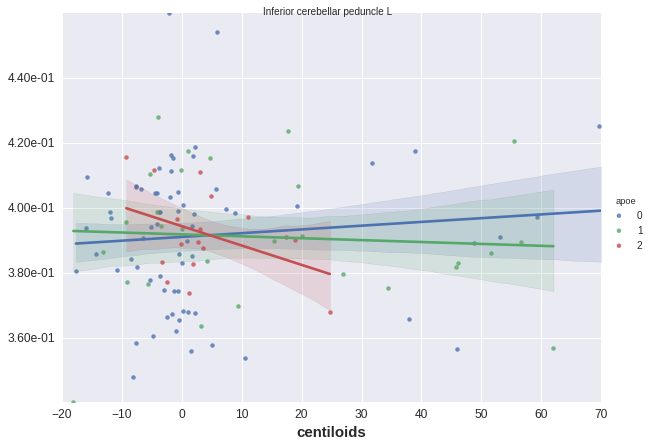

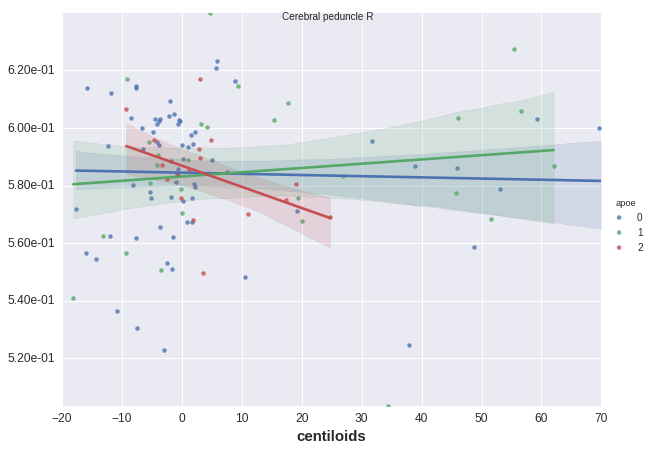

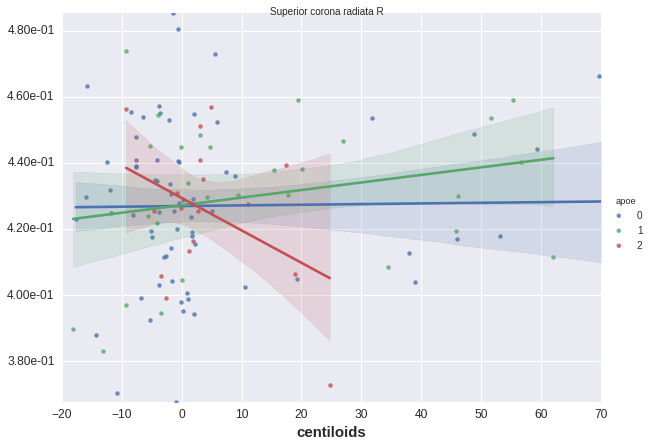

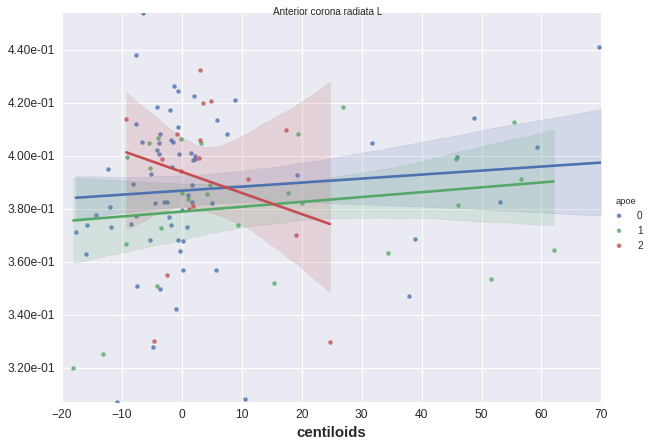

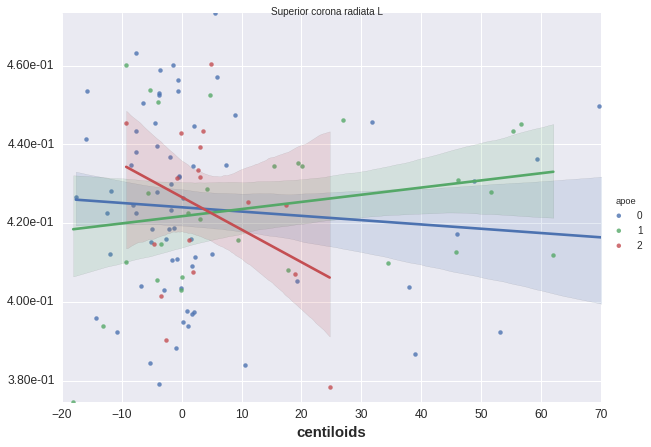

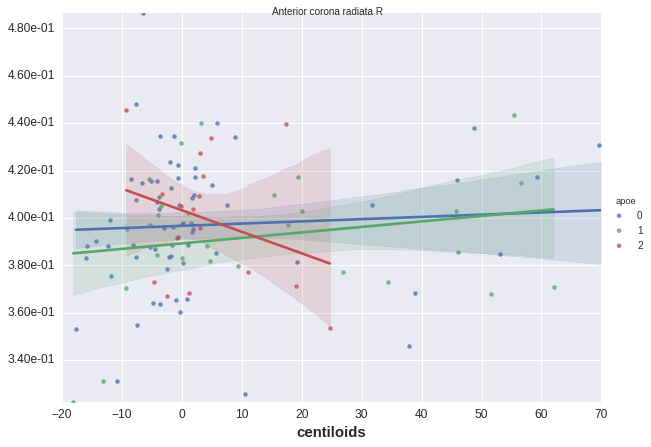

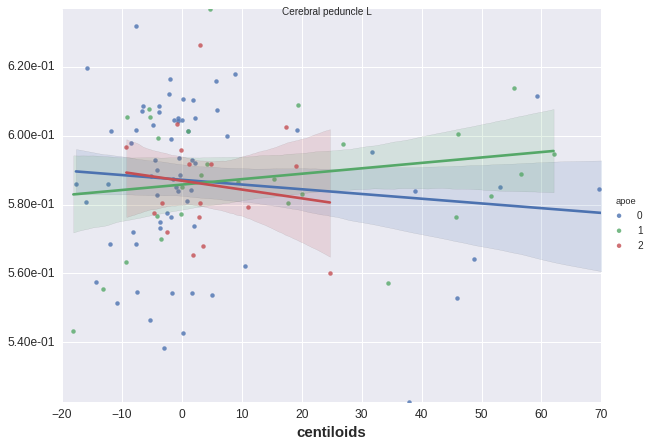

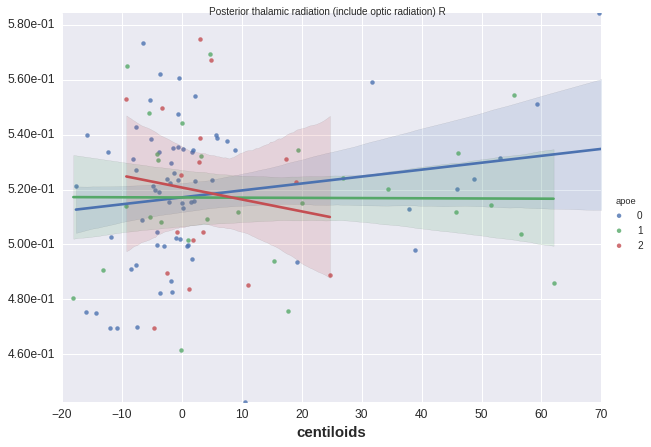

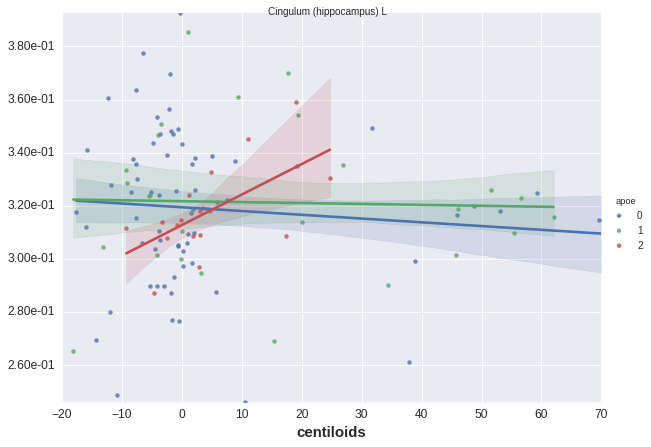

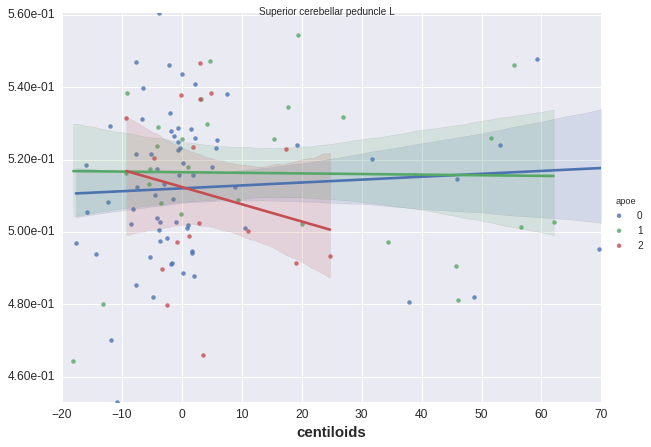

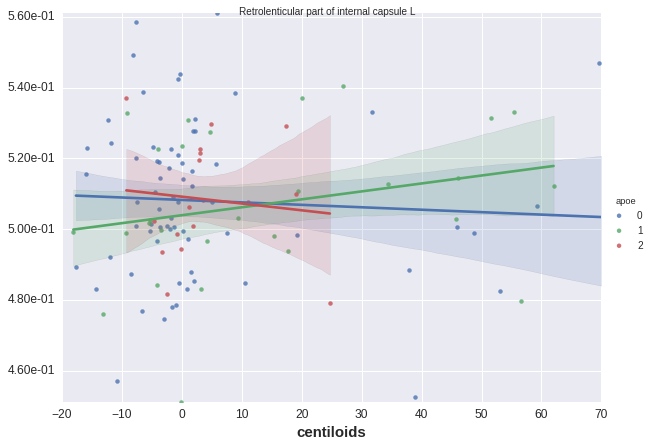

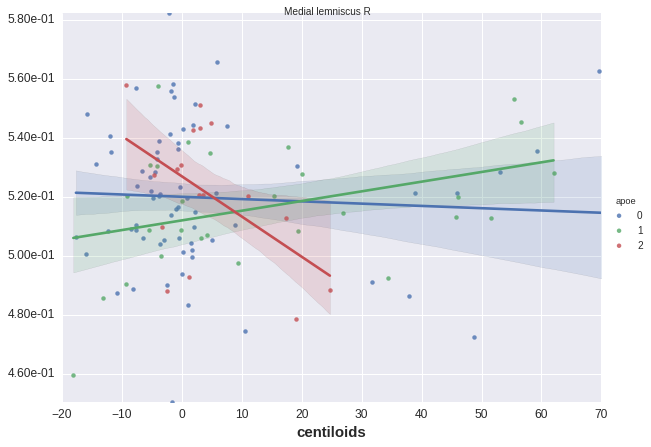

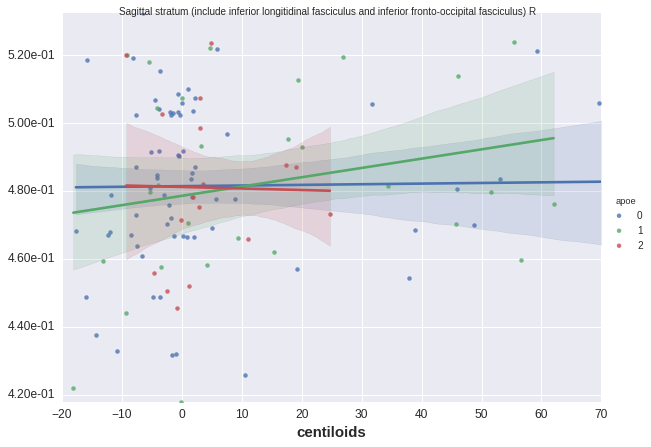

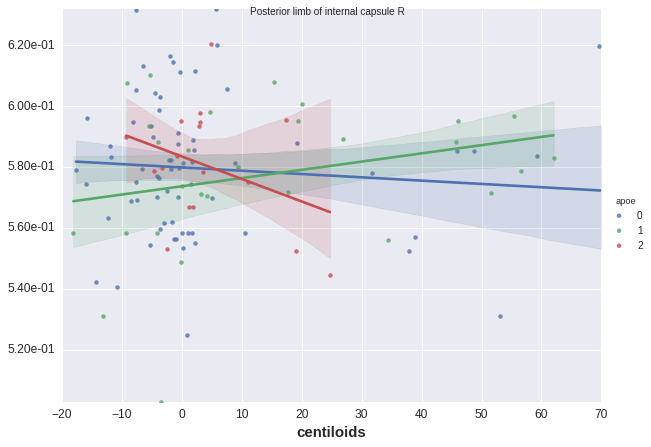

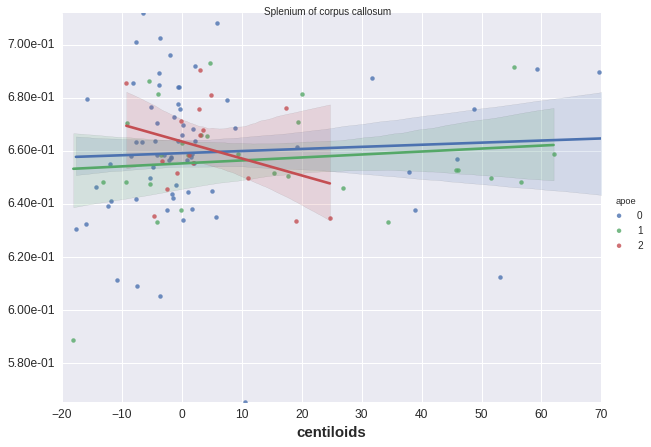

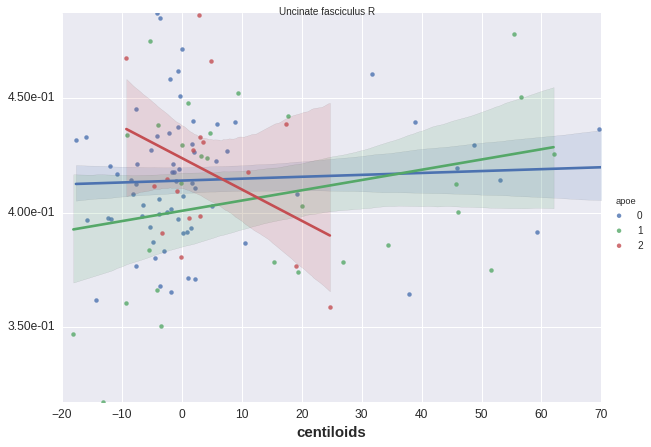

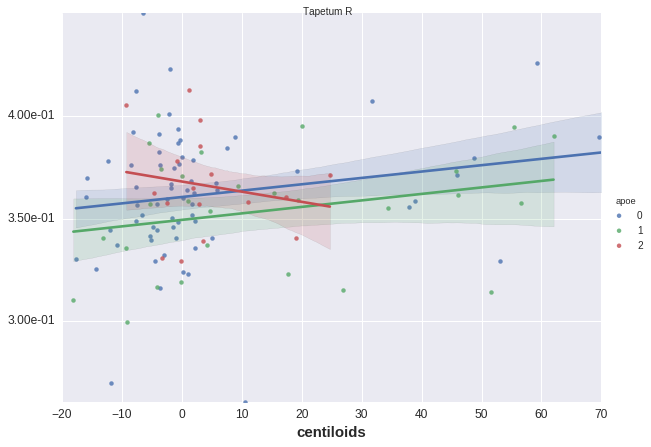

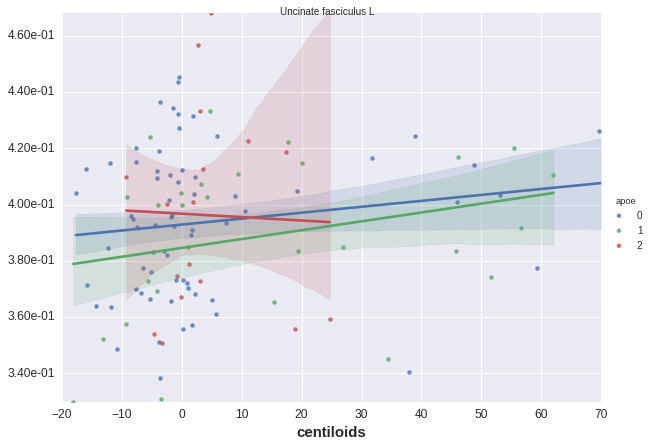

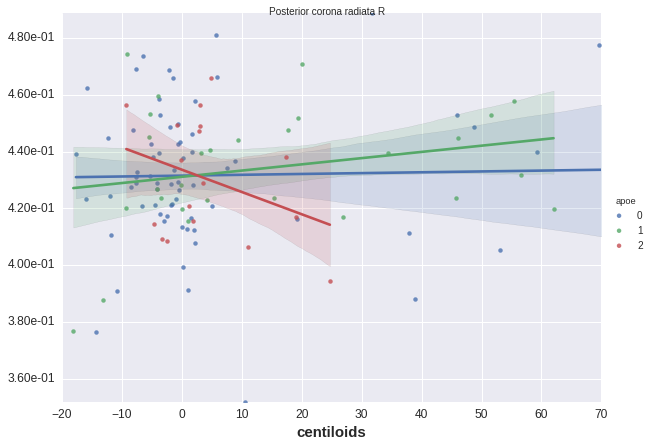

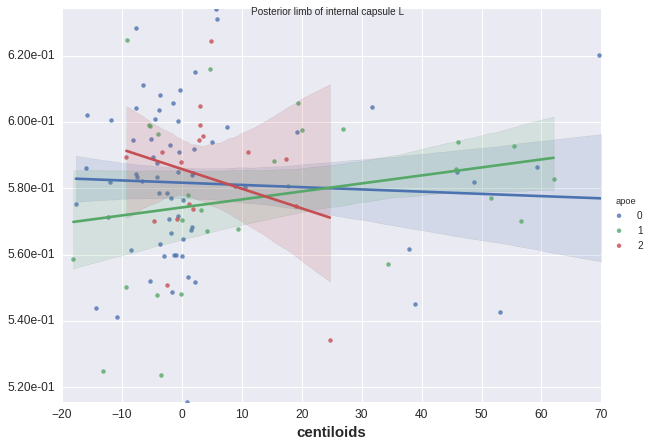

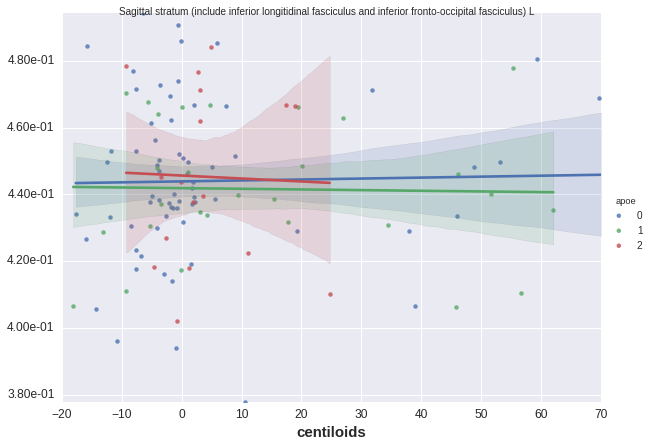

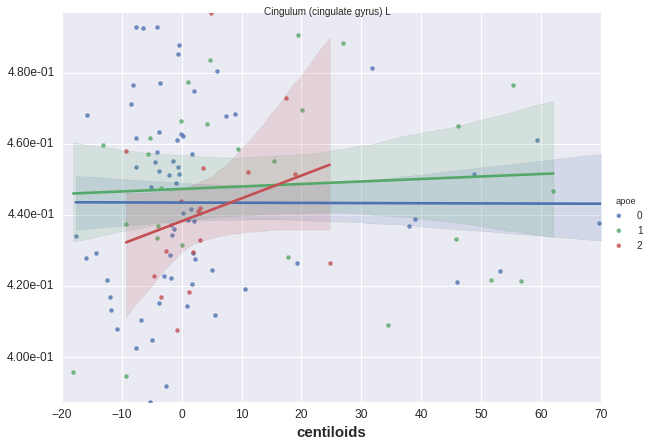

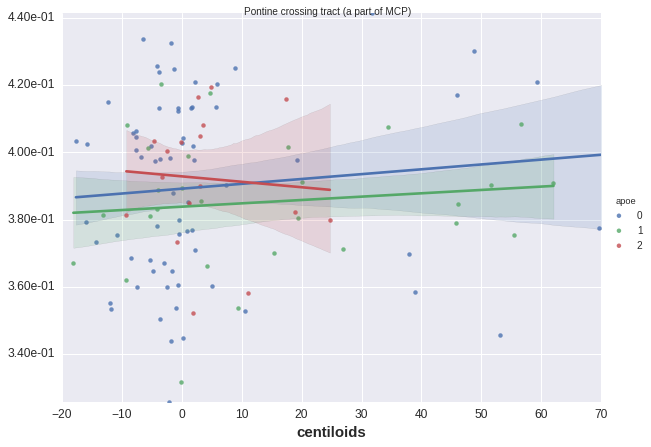

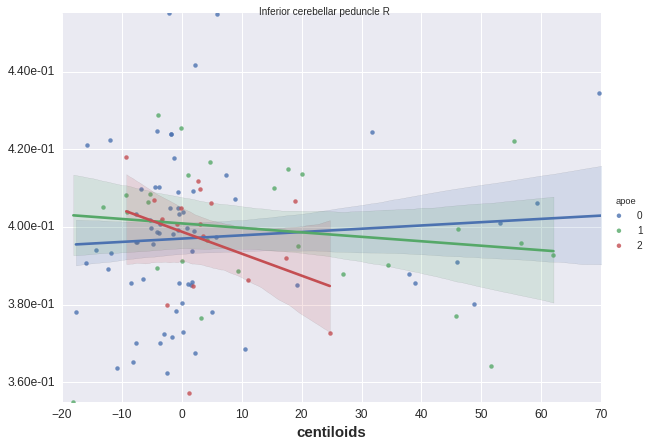

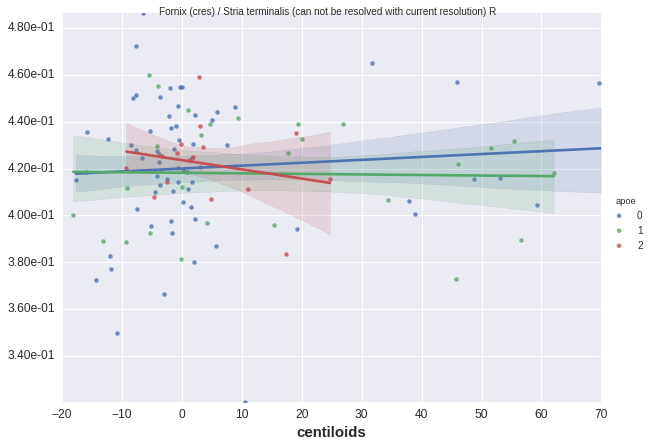

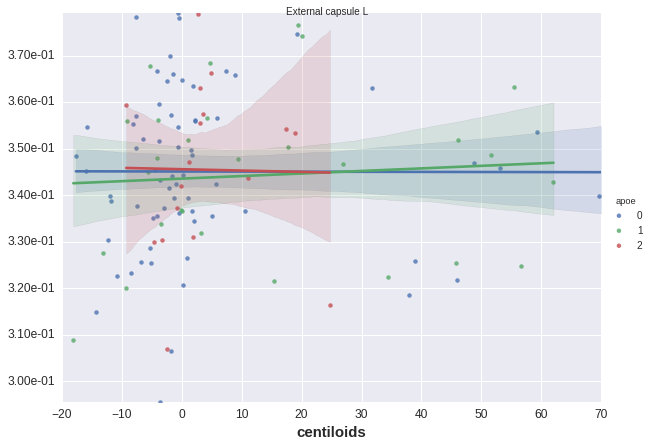

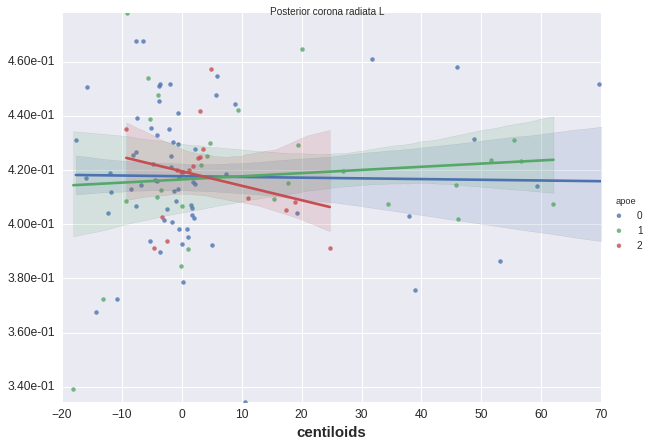

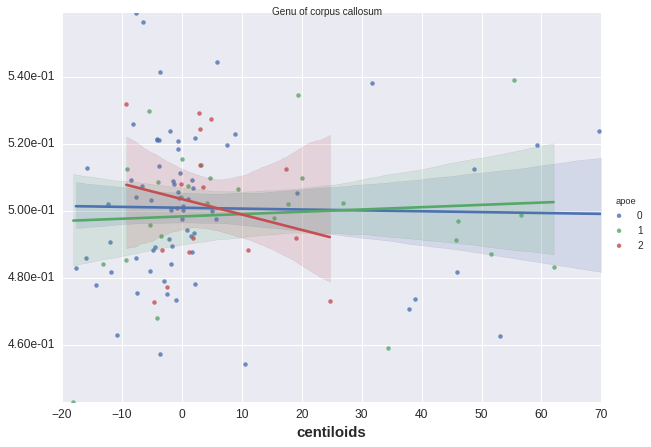

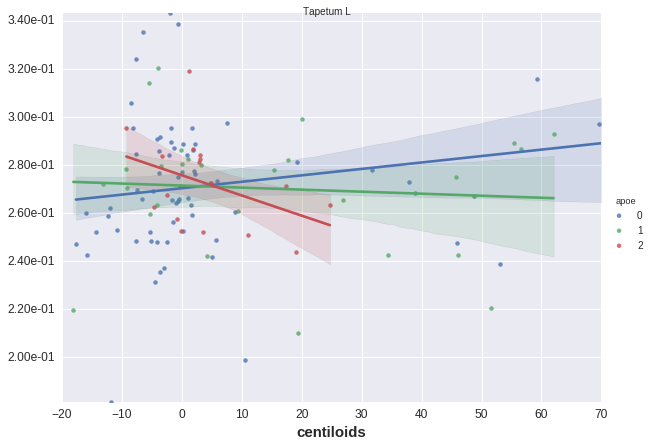

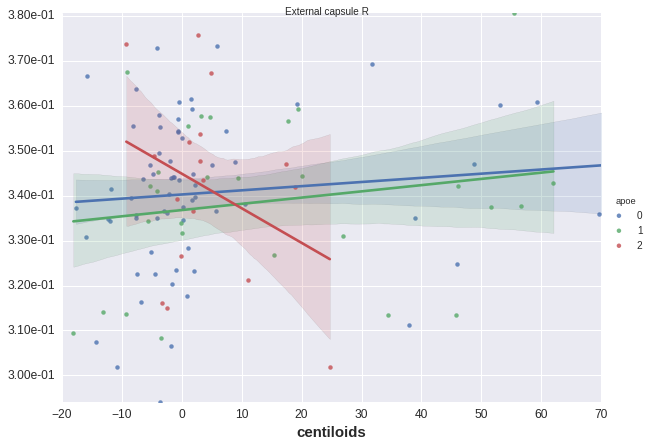

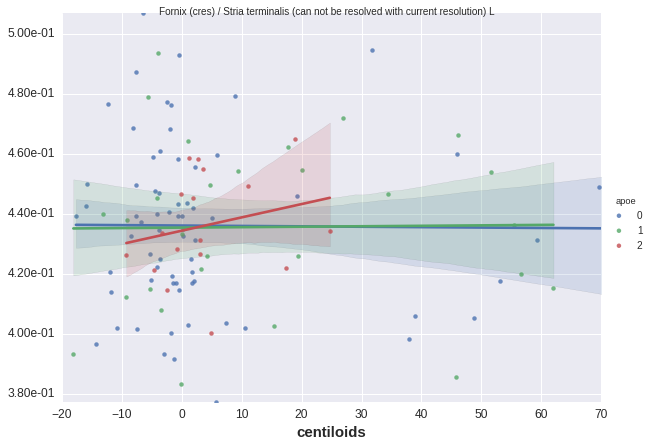

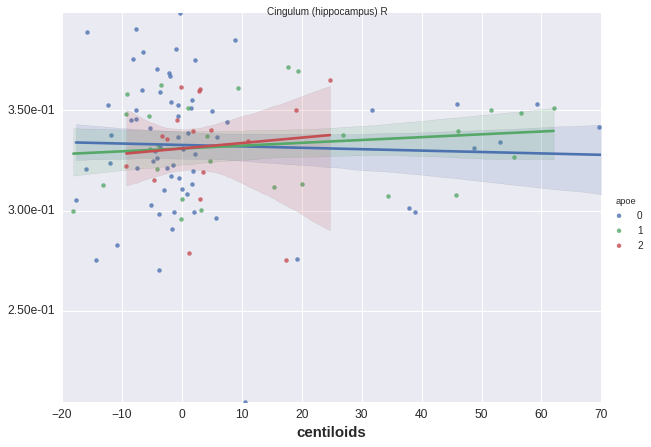

In [210]:
data = pd.read_excel('/tmp/amylstaging_ICBM-labels-1mm_TBSS_roivalues_FA.xls').set_index('subject')
cov = pd.read_excel('/home/grg/SPM/2018/covariates.xlsx').set_index('subject')
data = data.join(cov)

for i, each in enumerate(set(data.columns).difference(set(cov.columns))):
    plotting.lm_plot(each, 'centiloids', data)

### Axial diffusivity

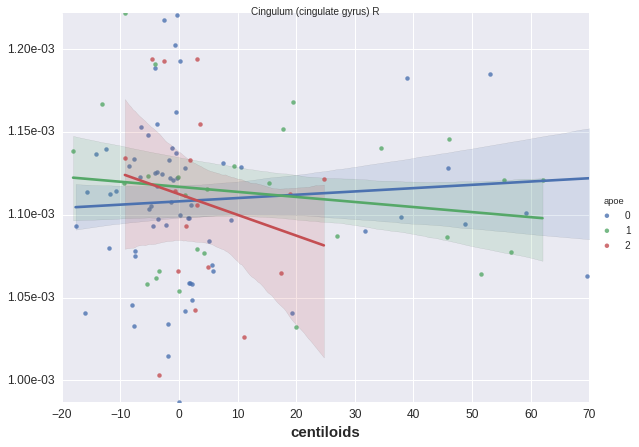

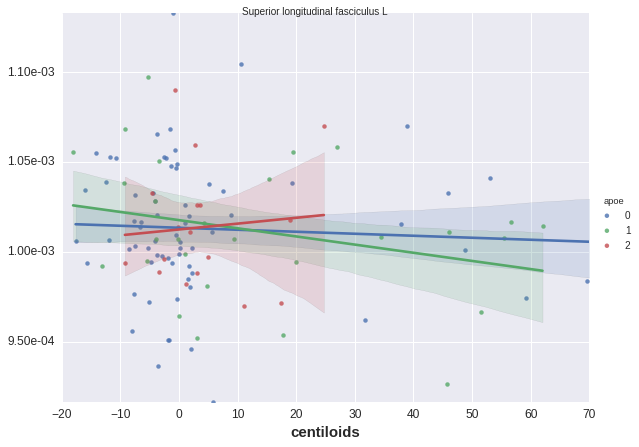

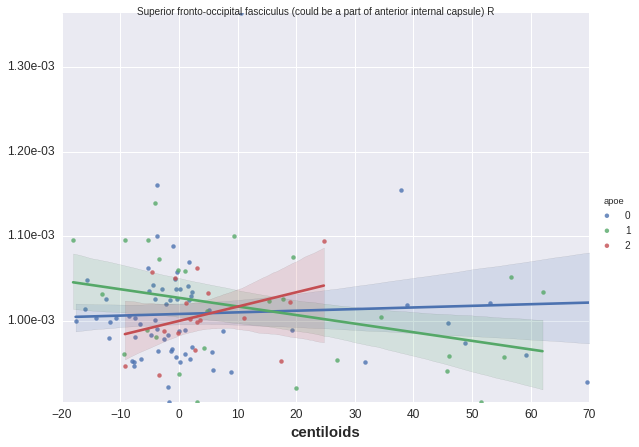

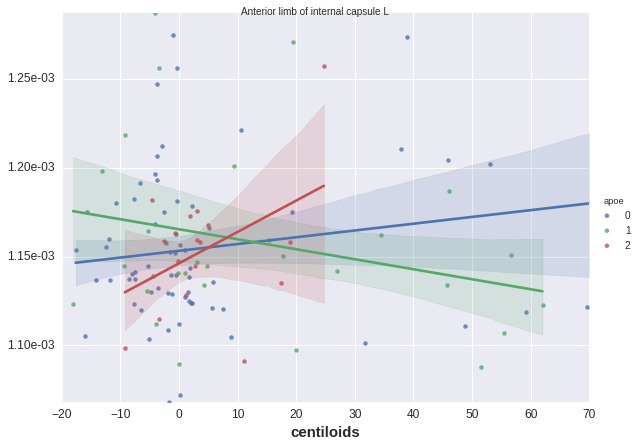

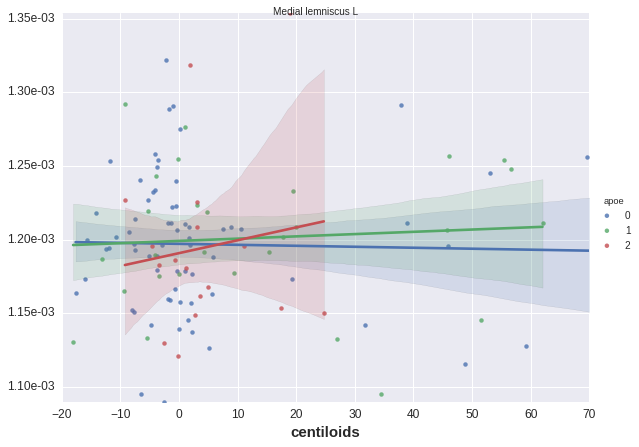

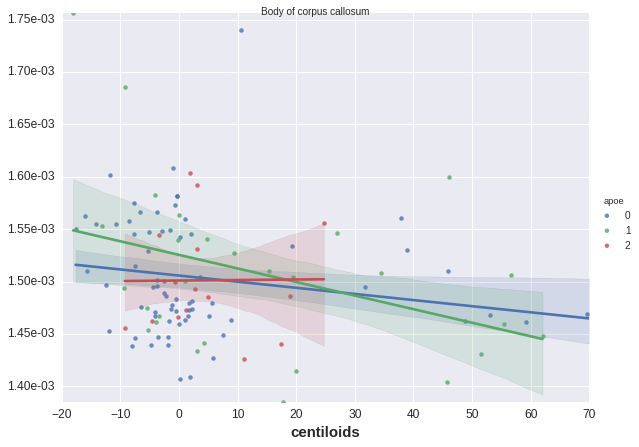

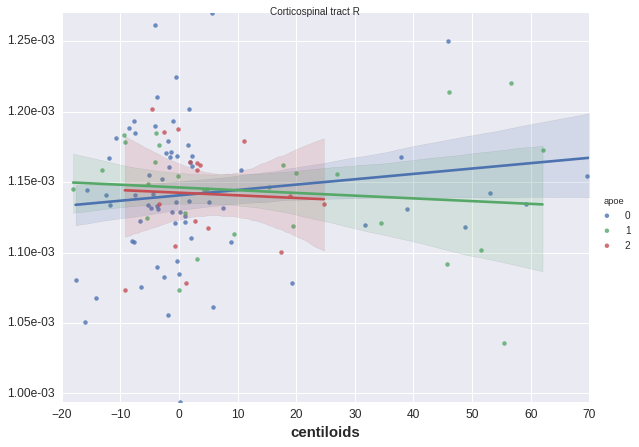

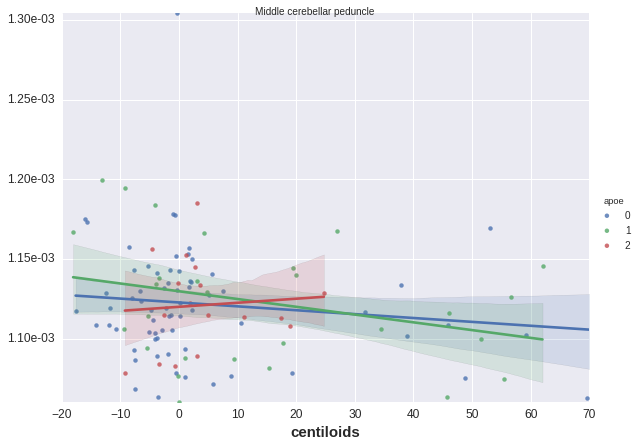

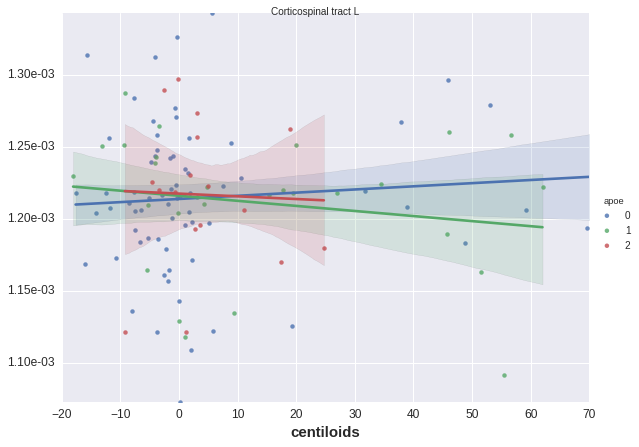

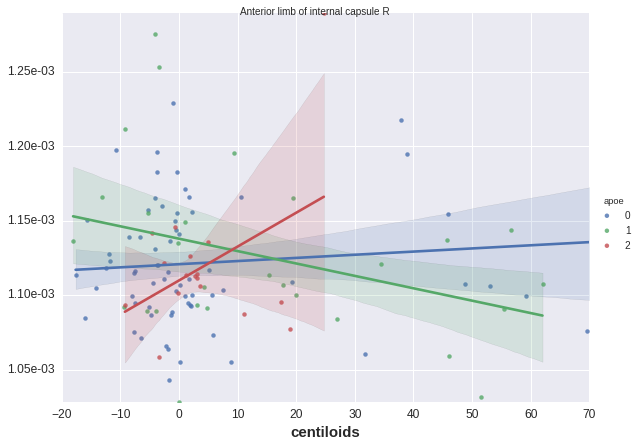

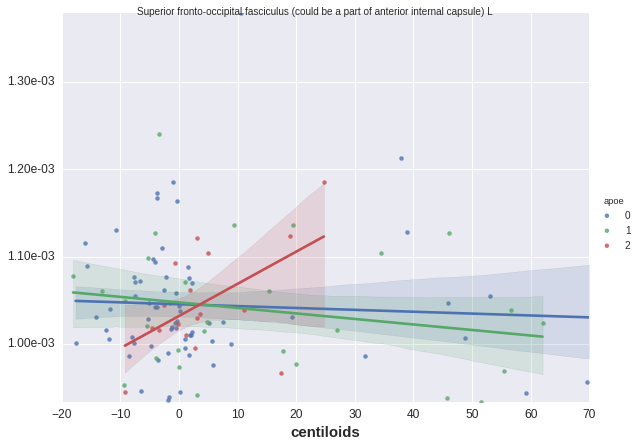

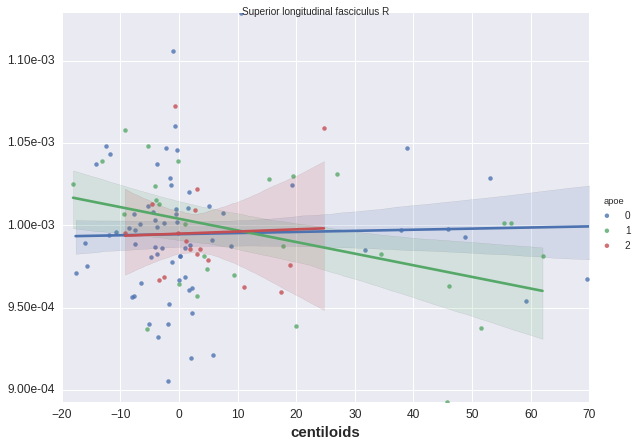

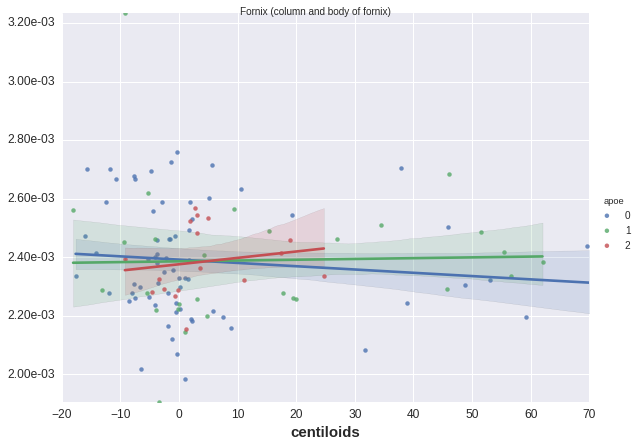

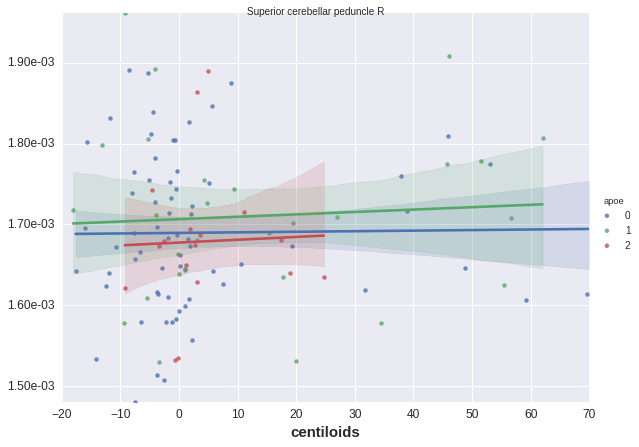

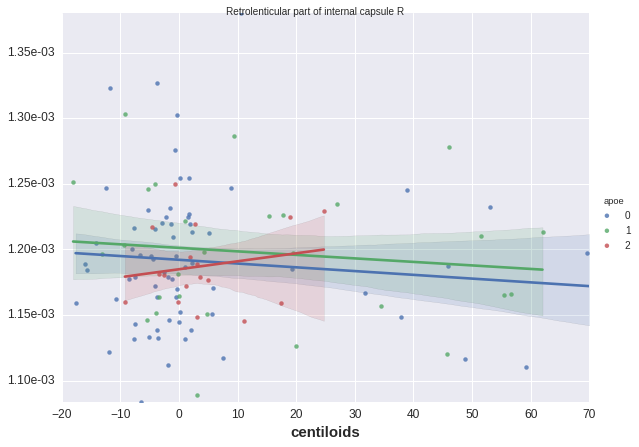

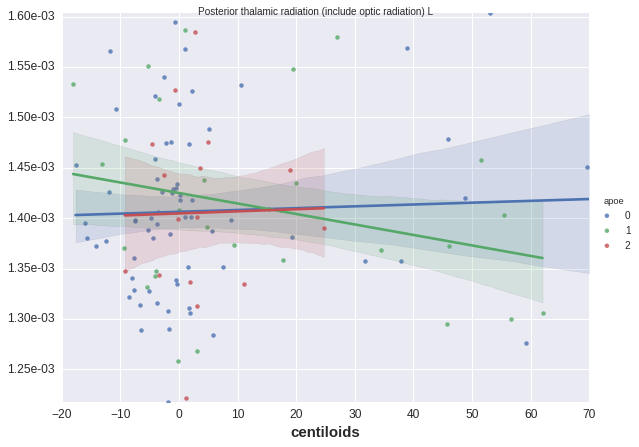

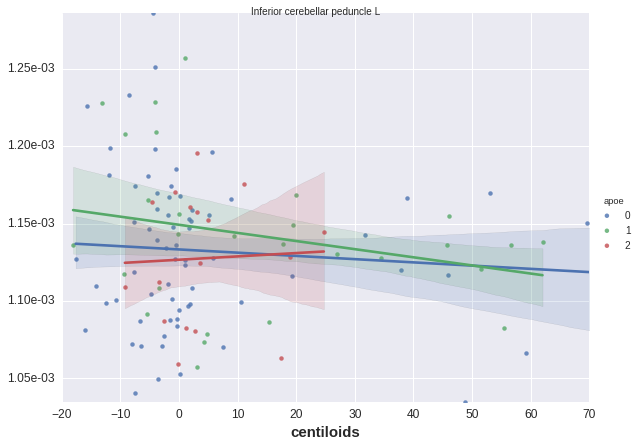

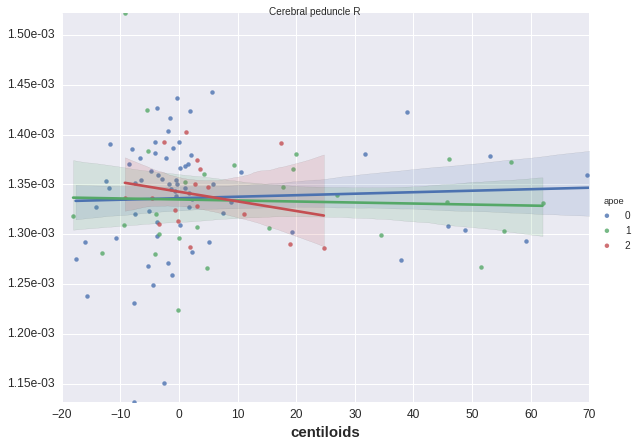

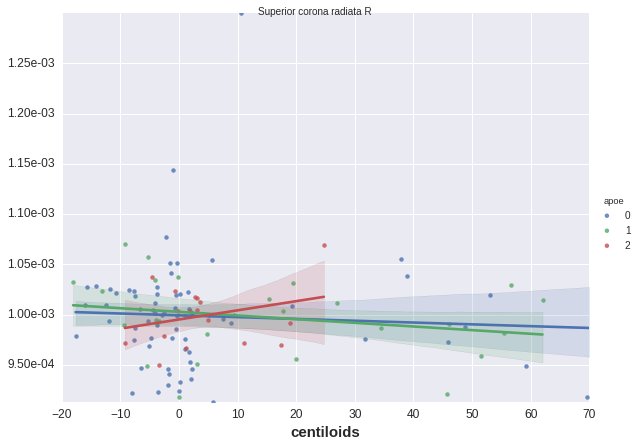

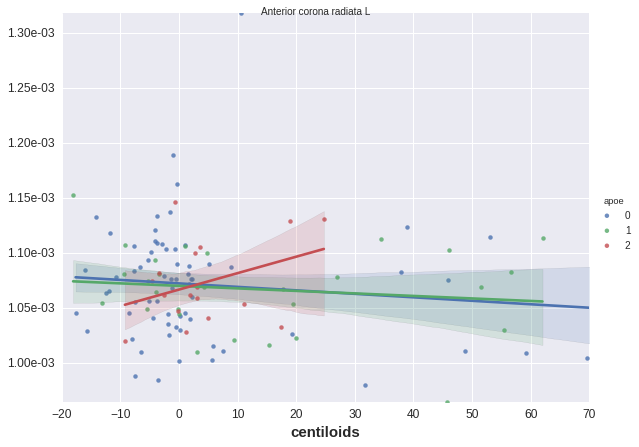

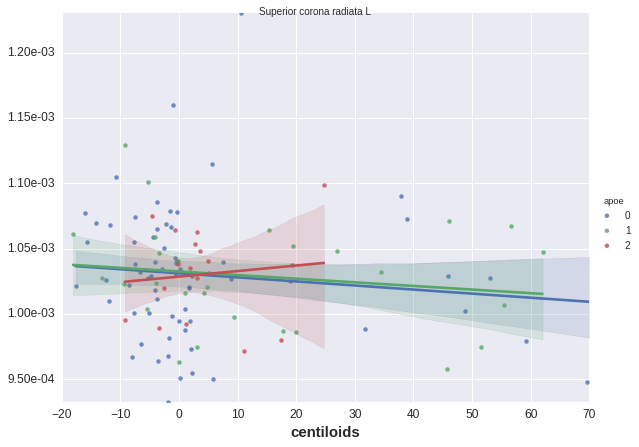

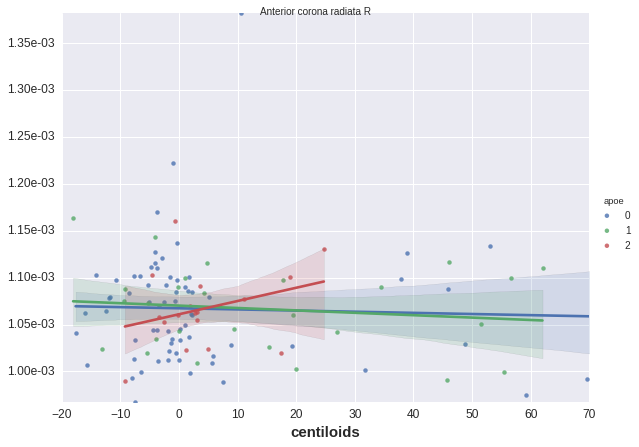

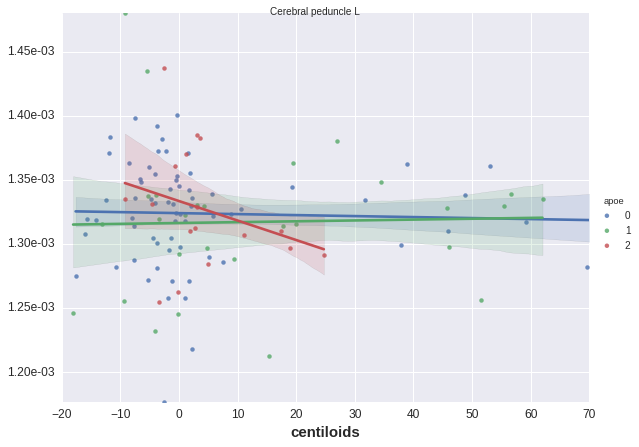

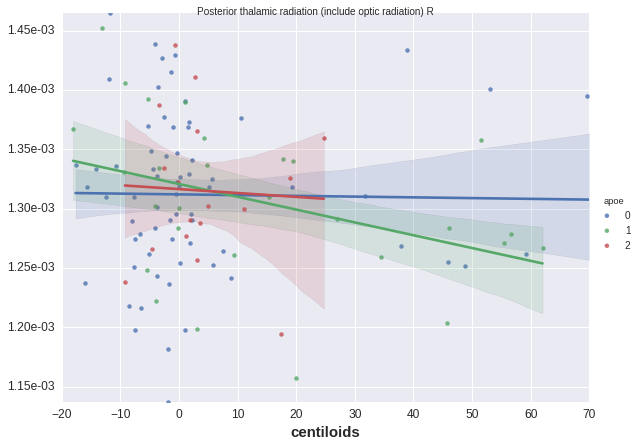

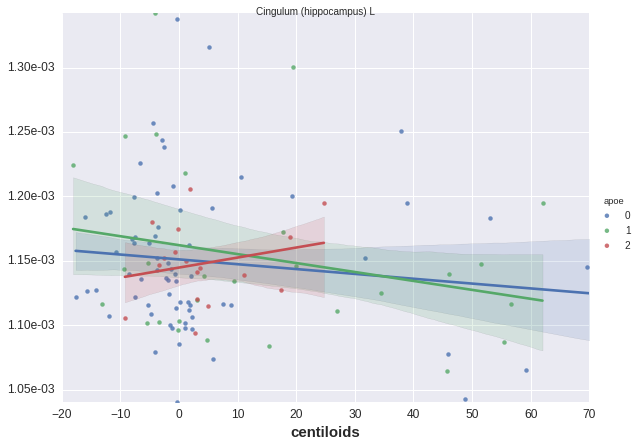

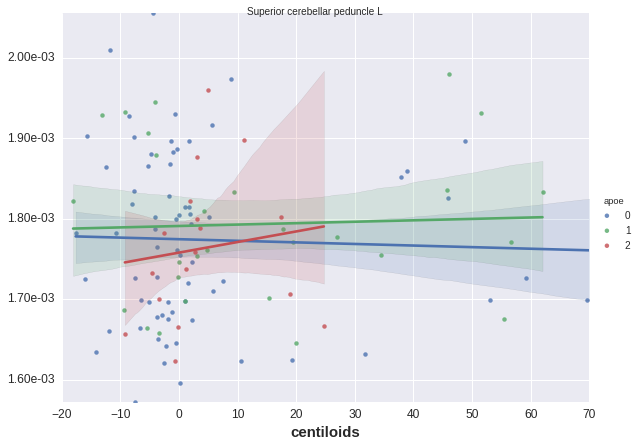

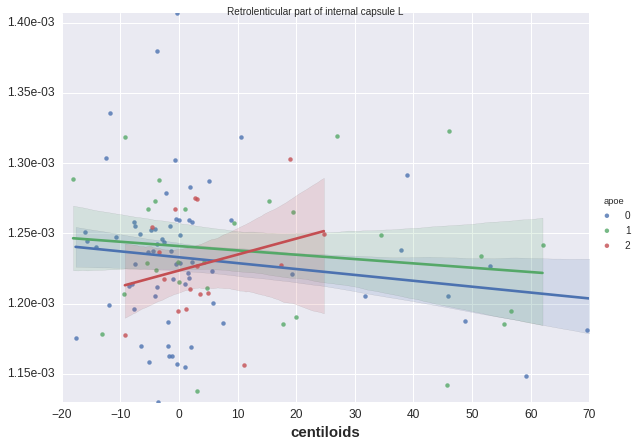

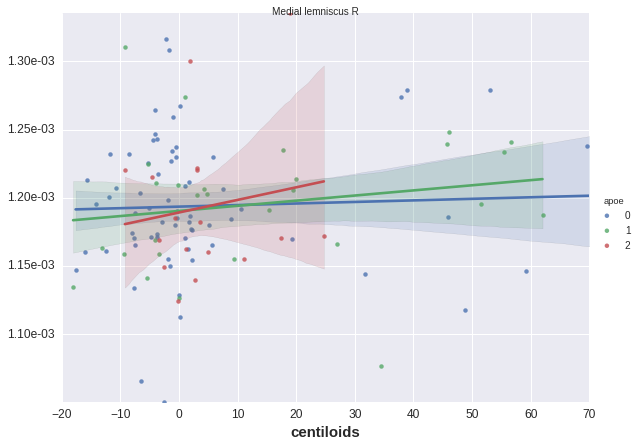

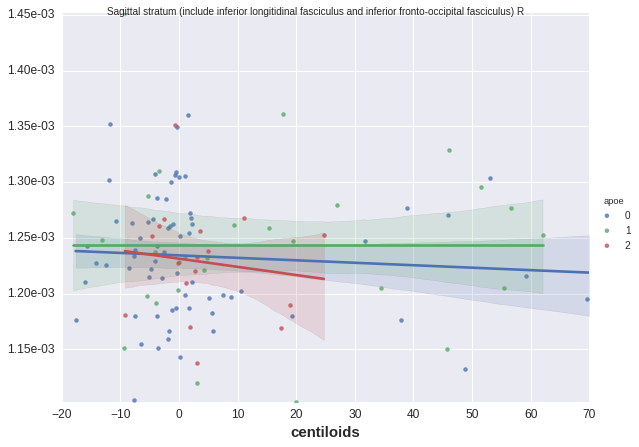

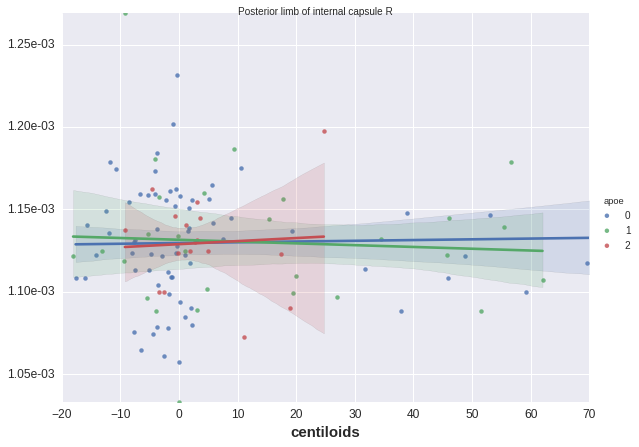

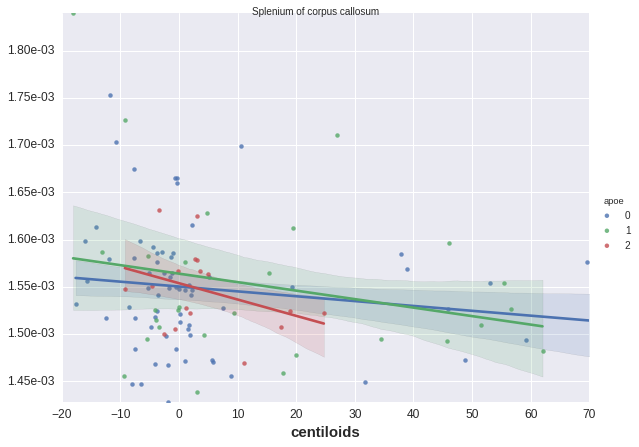

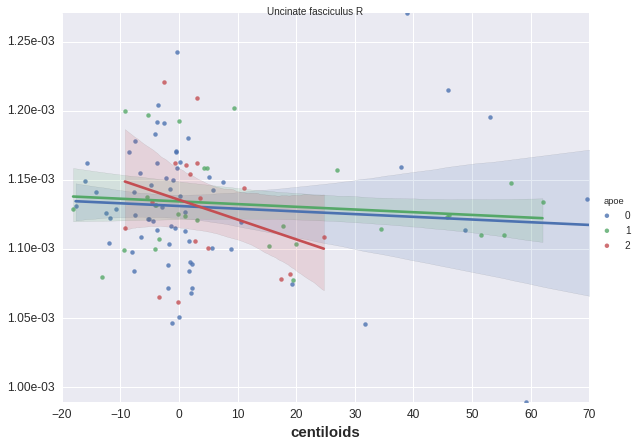

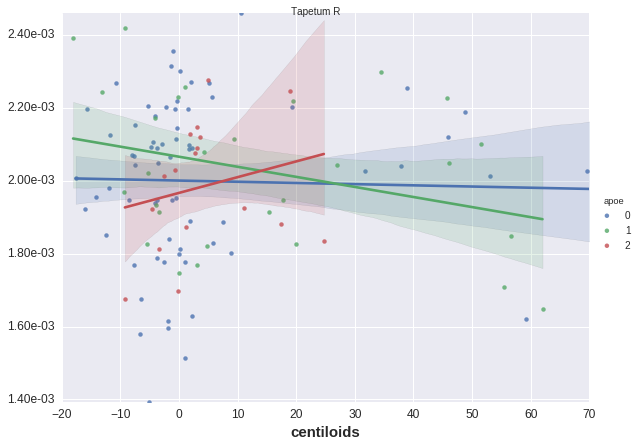

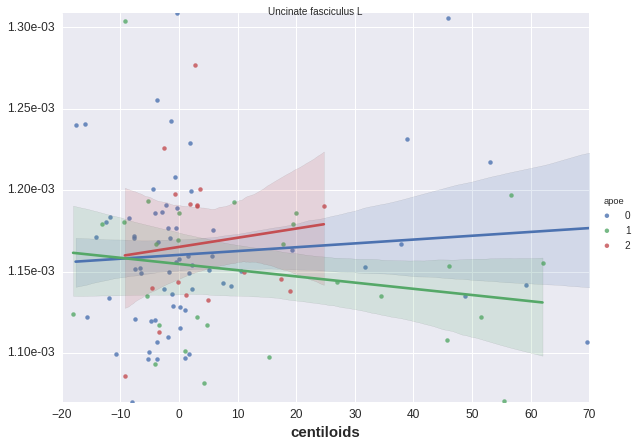

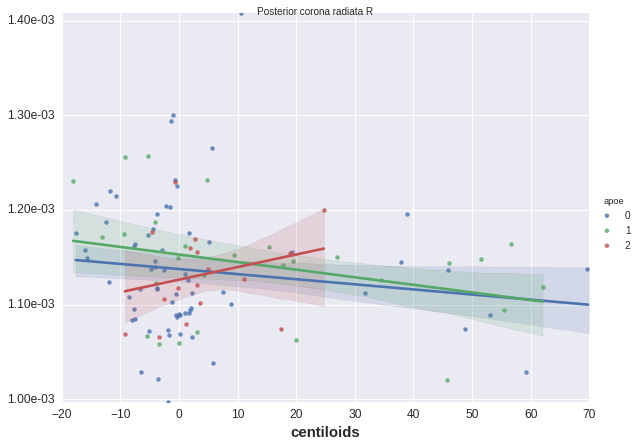

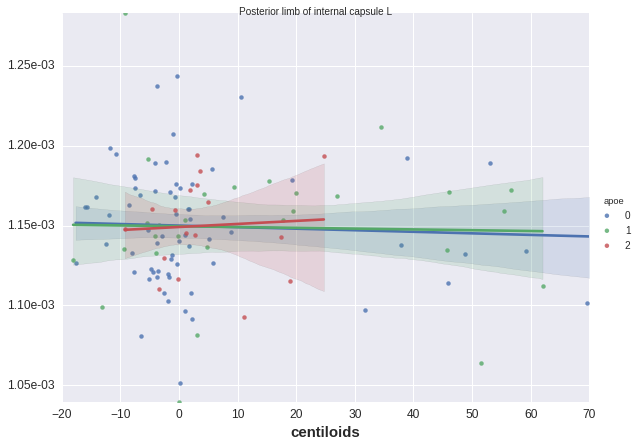

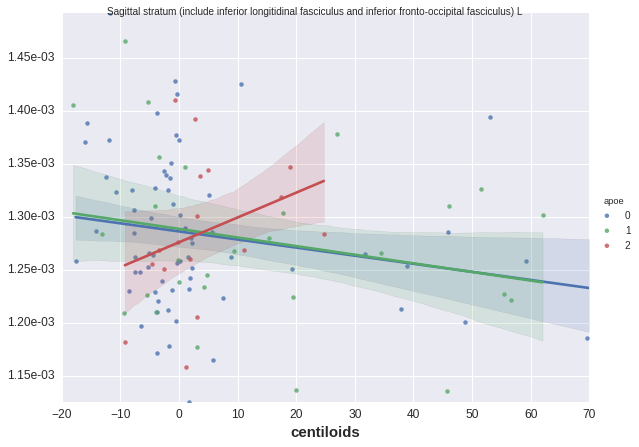

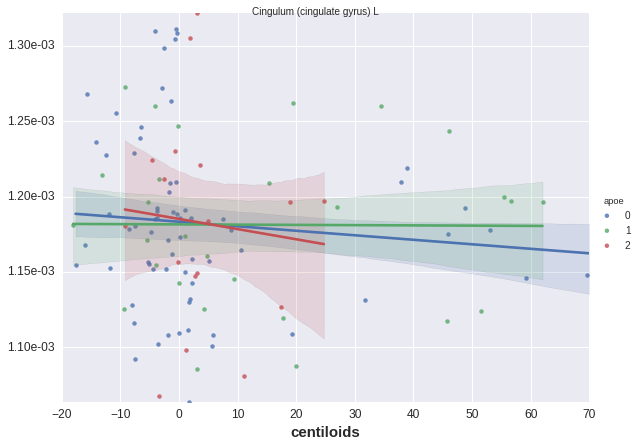

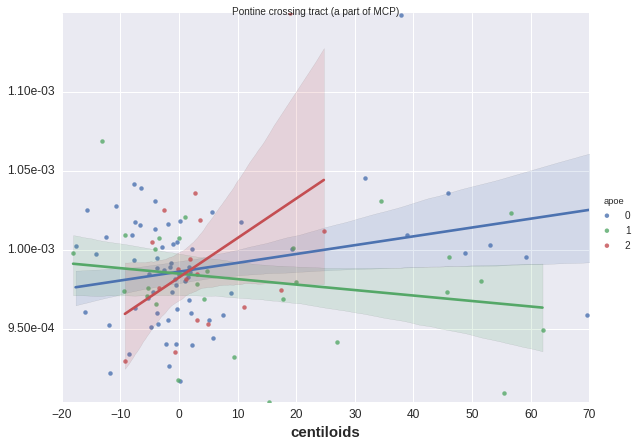

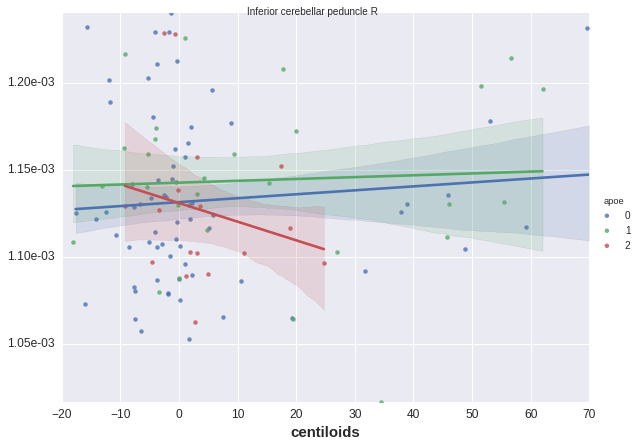

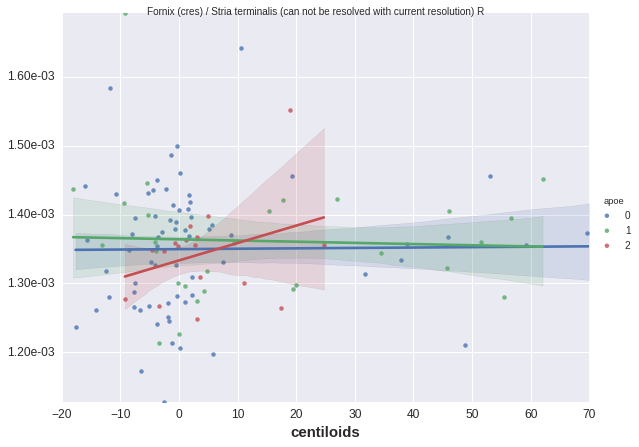

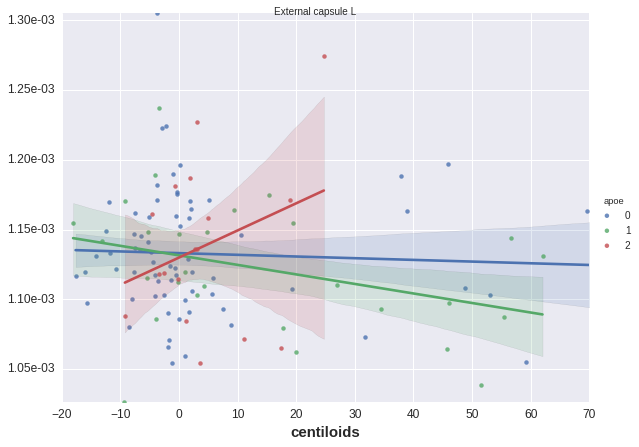

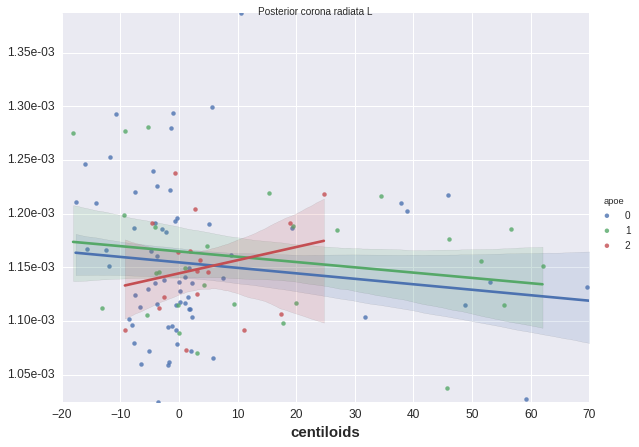

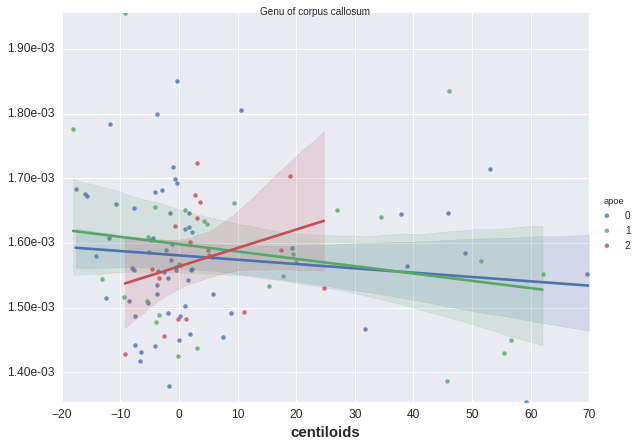

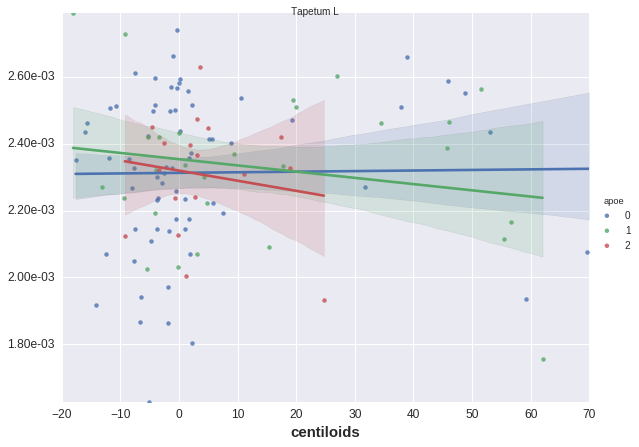

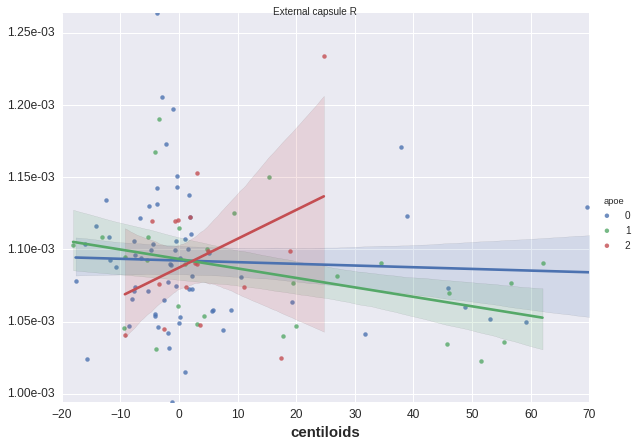

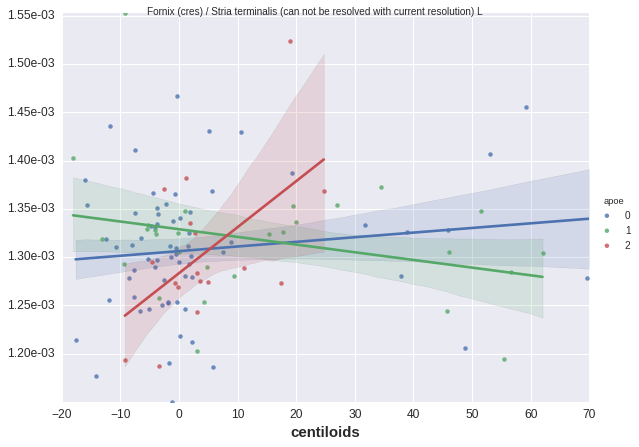

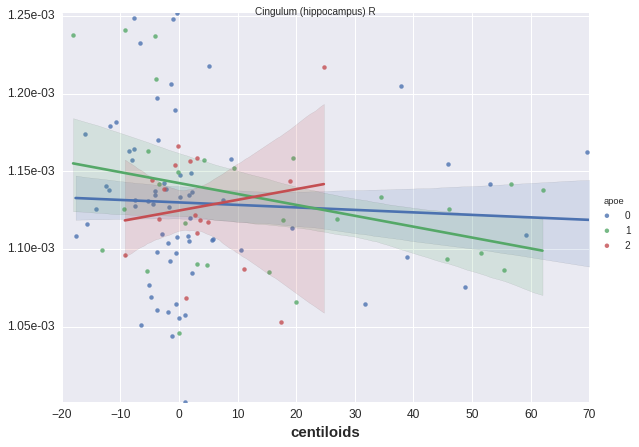

In [211]:
from roistats import plotting
reload(plotting)
data = pd.read_excel('/tmp/amylstaging_ICBM-labels-1mm_TBSS_roivalues_L1.xls').set_index('subject')
cov = pd.read_excel('/home/grg/SPM/2018/covariates.xlsx').set_index('subject')
data = data.join(cov)

for i, each in enumerate(set(data.columns).difference(set(cov.columns))):
    plotting.lm_plot(each, 'centiloids', data)

### Radial diffusivity

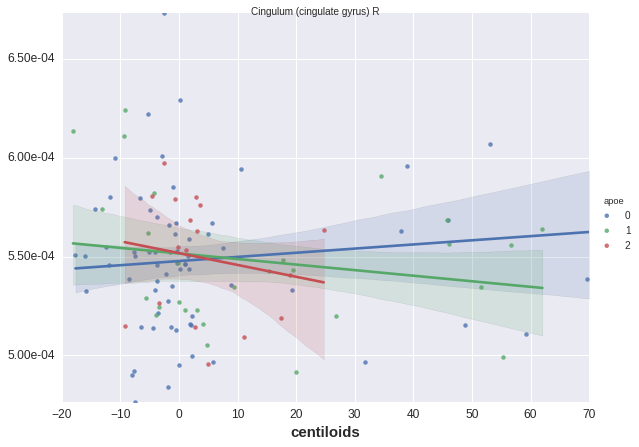

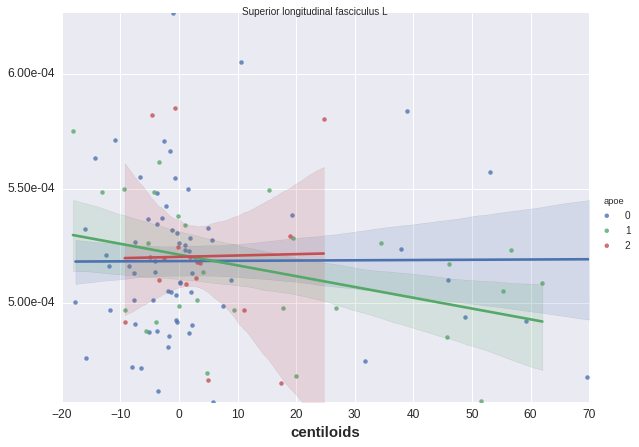

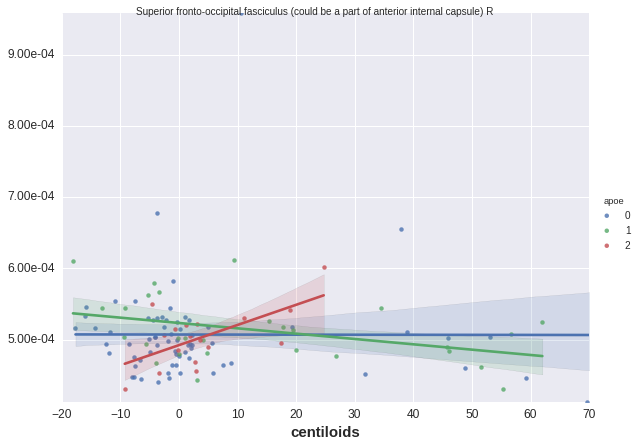

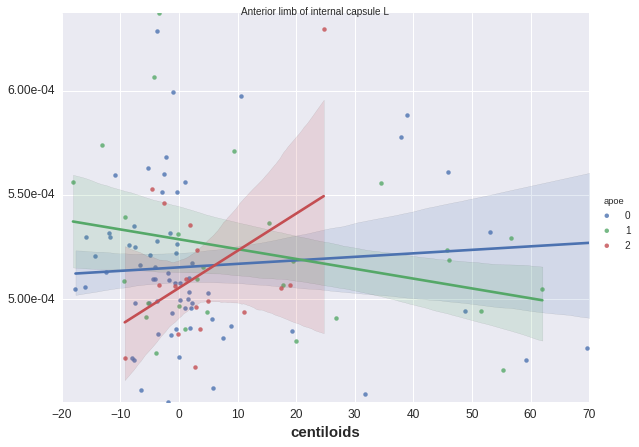

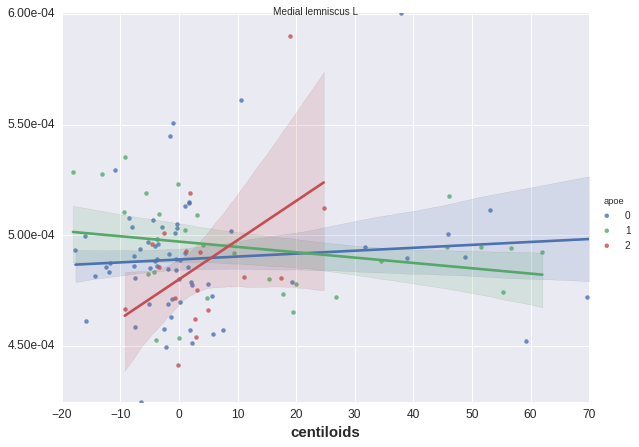

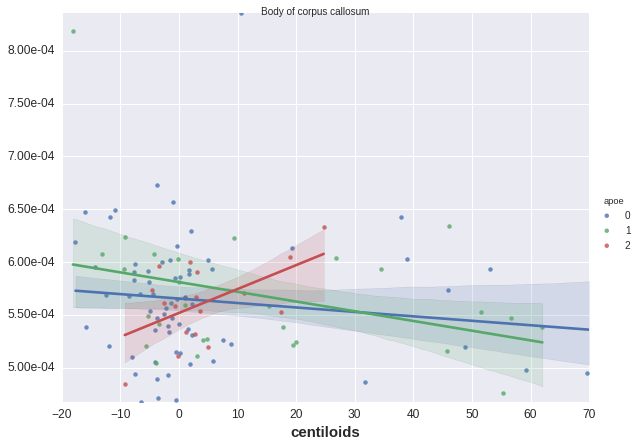

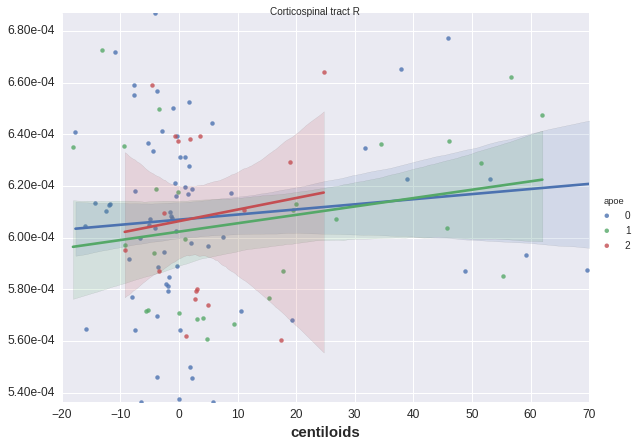

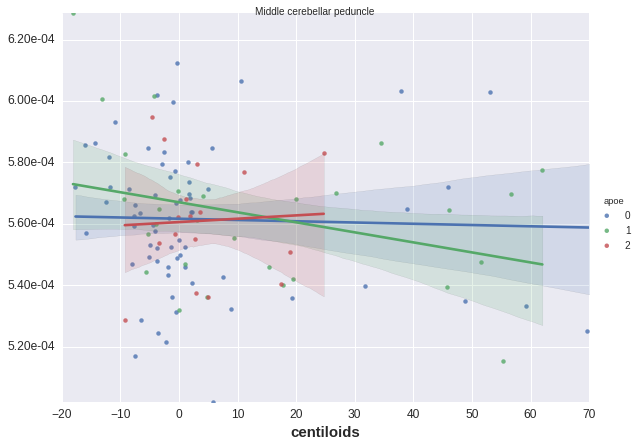

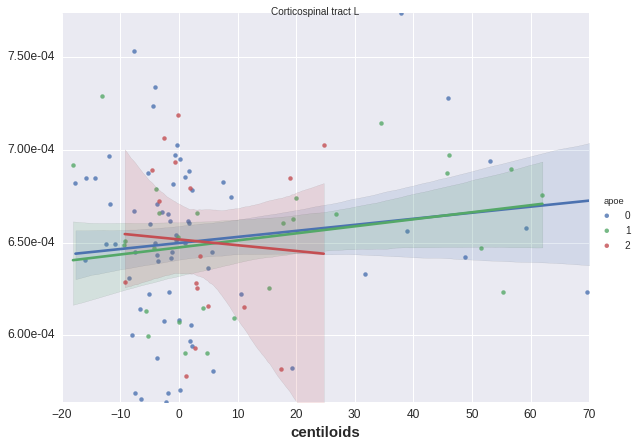

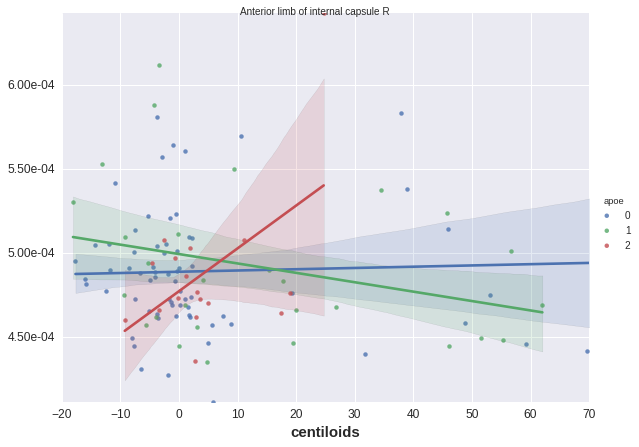

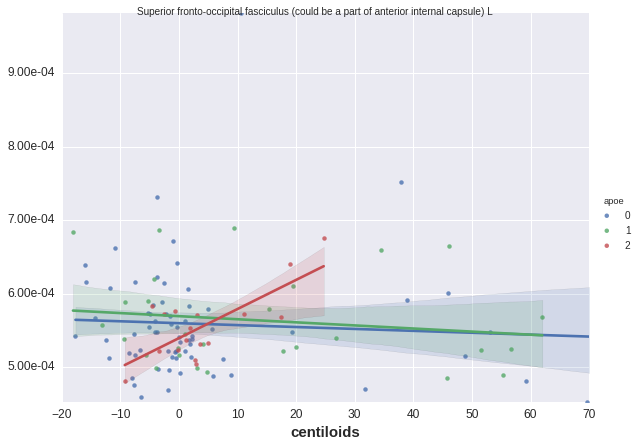

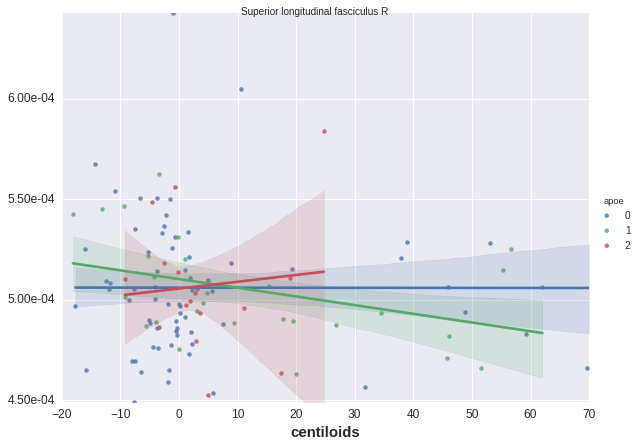

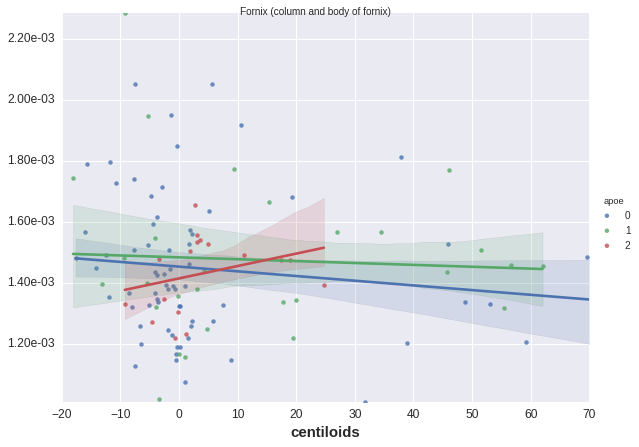

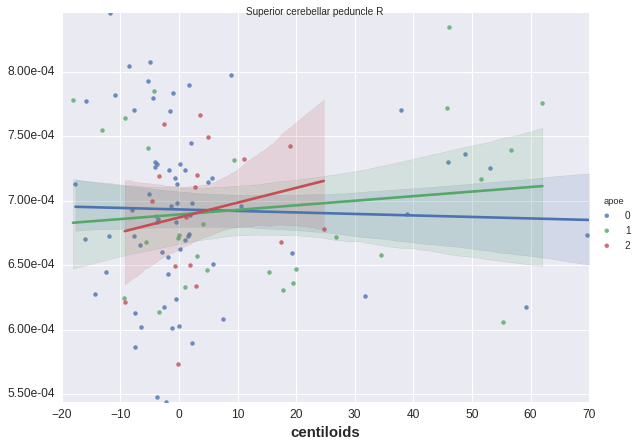

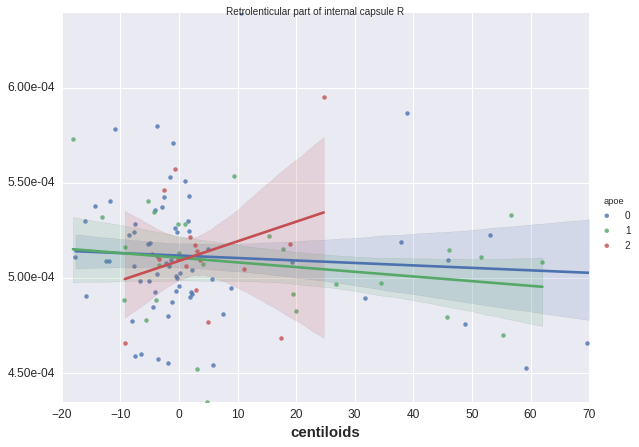

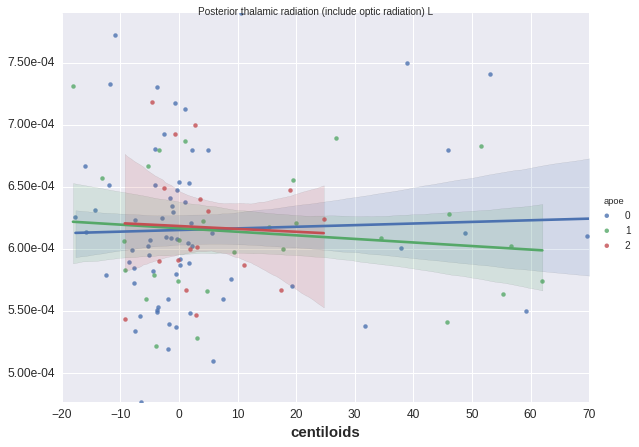

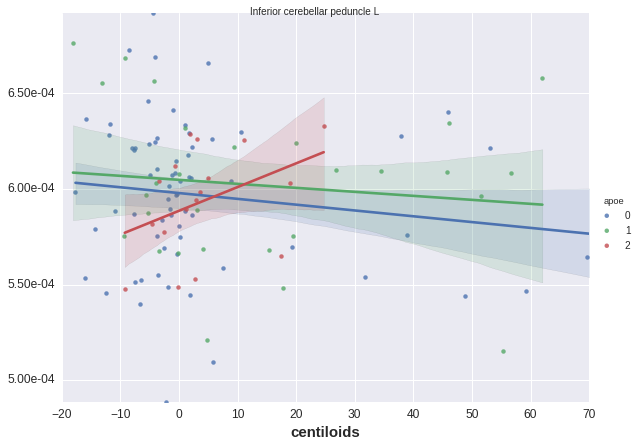

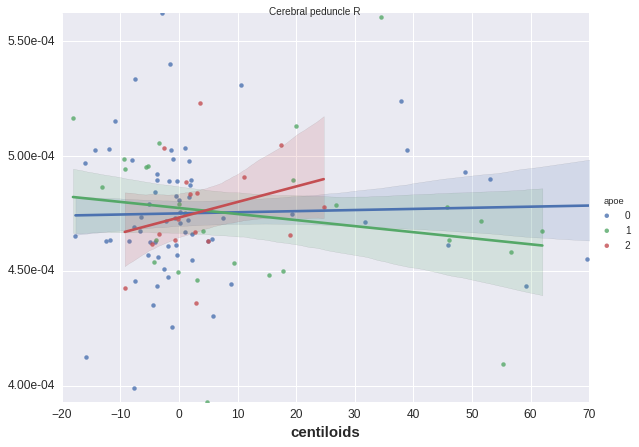

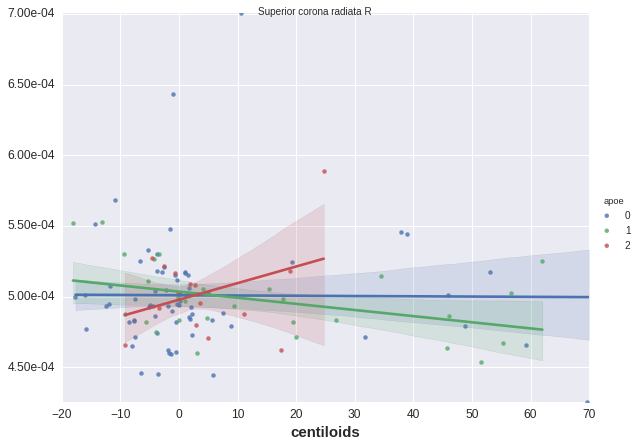

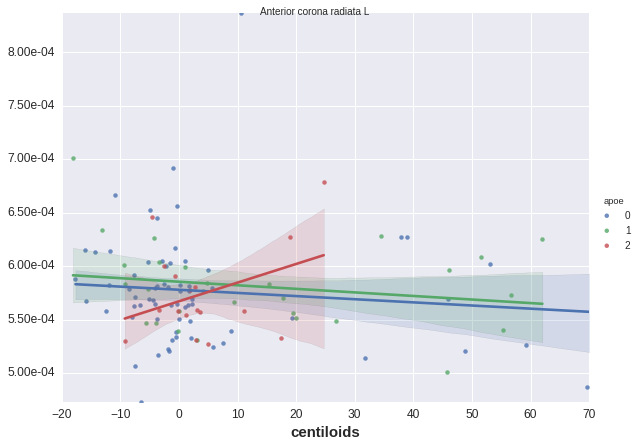

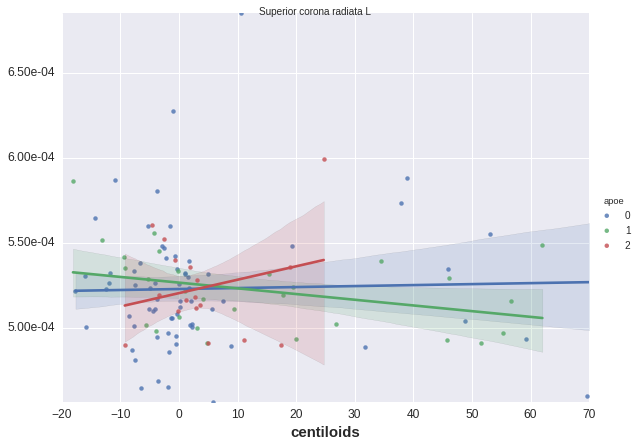

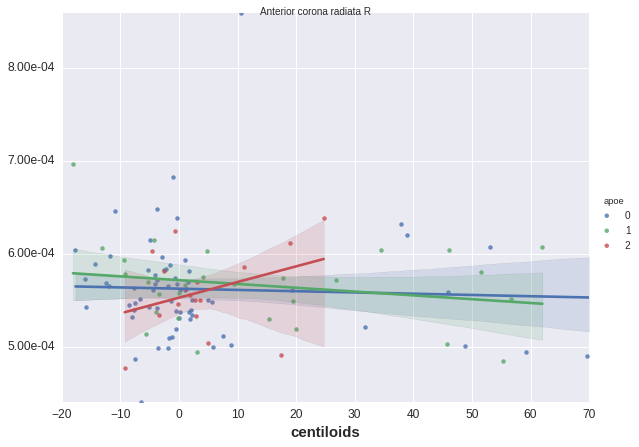

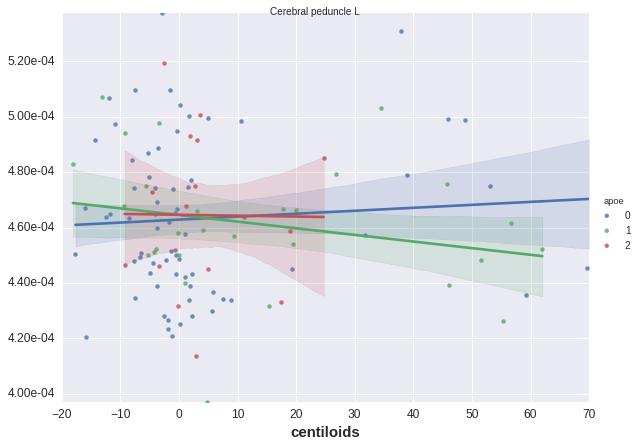

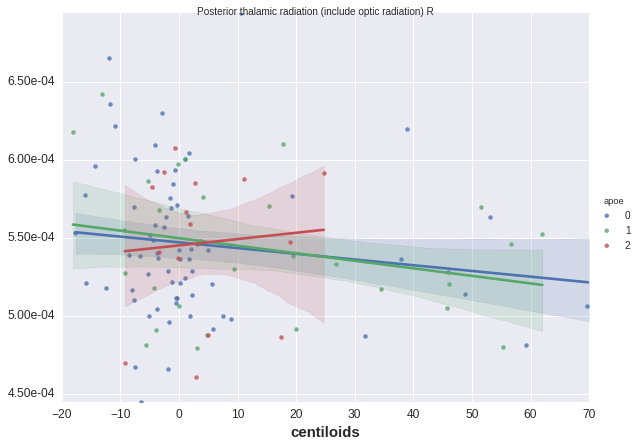

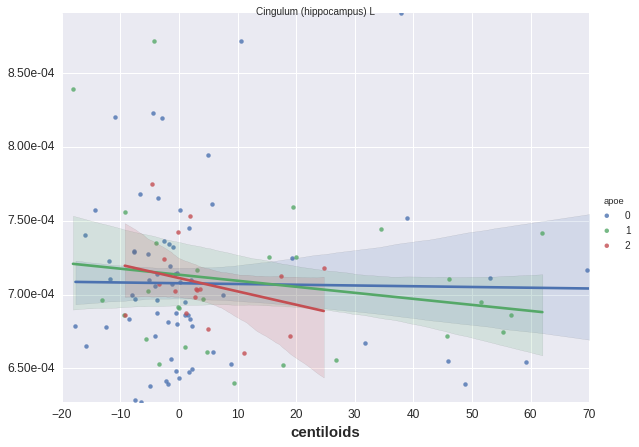

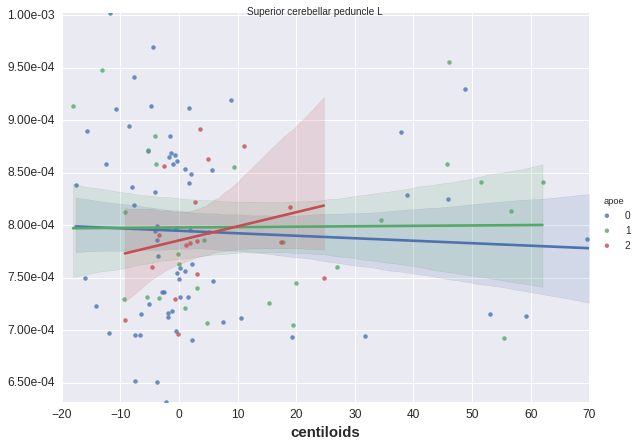

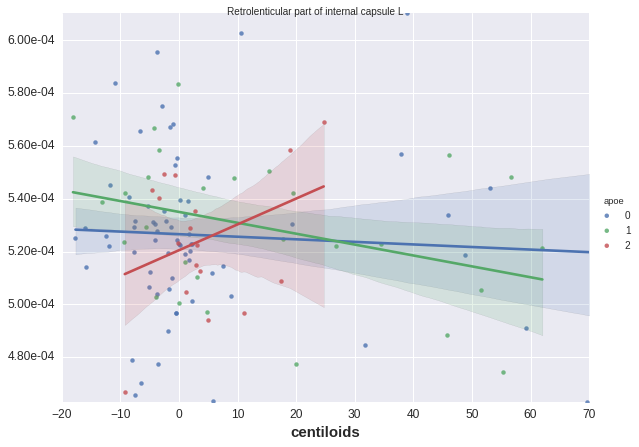

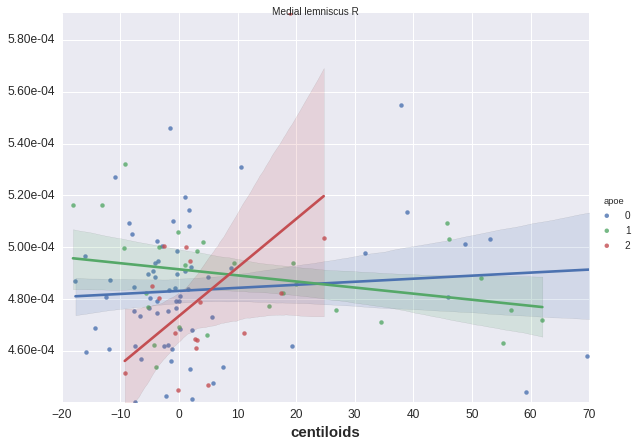

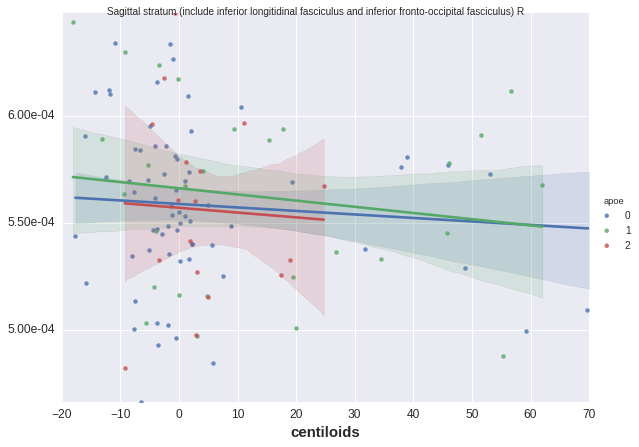

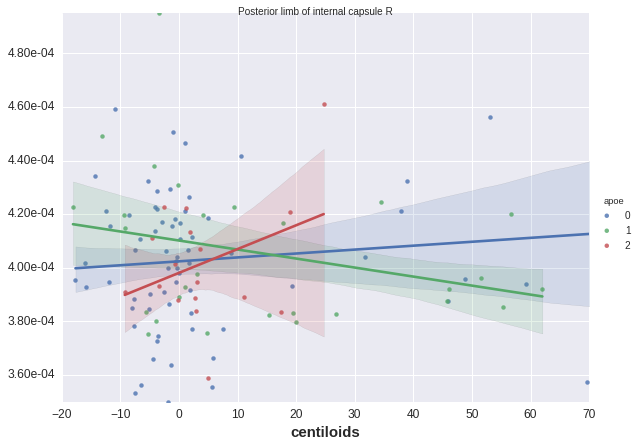

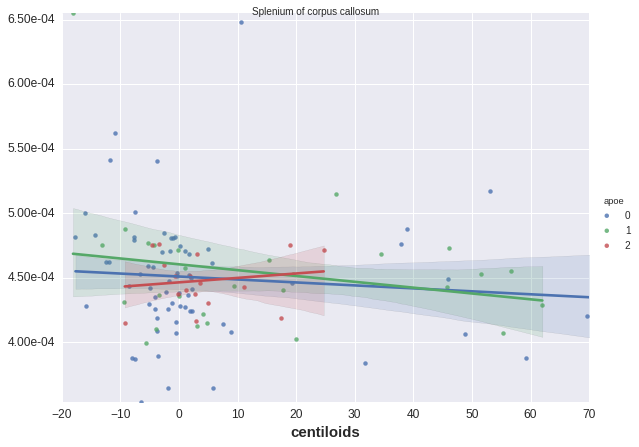

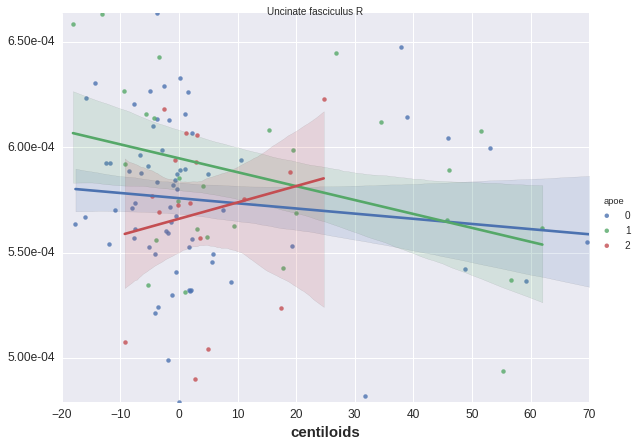

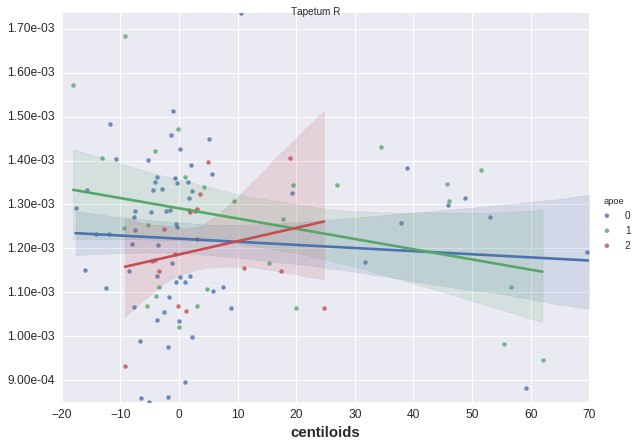

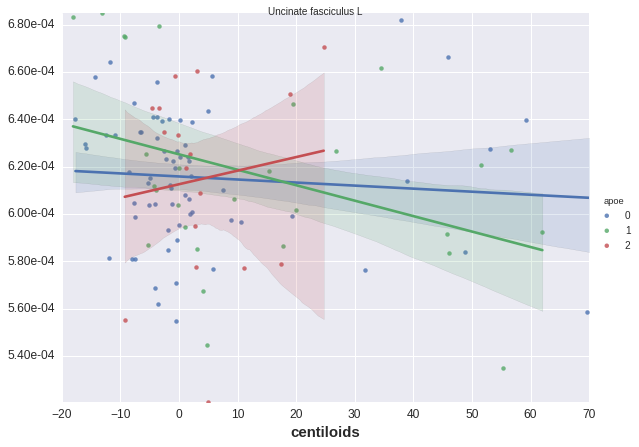

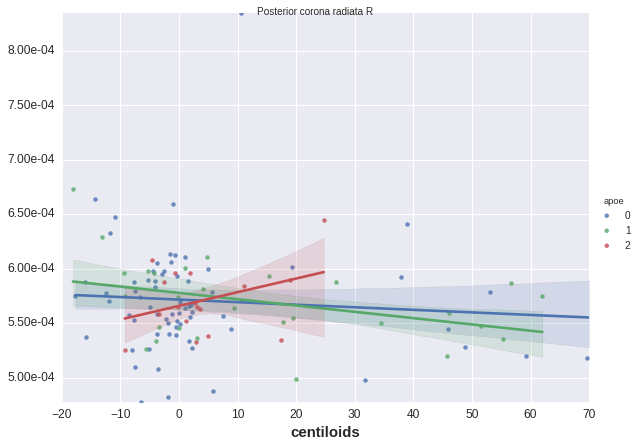

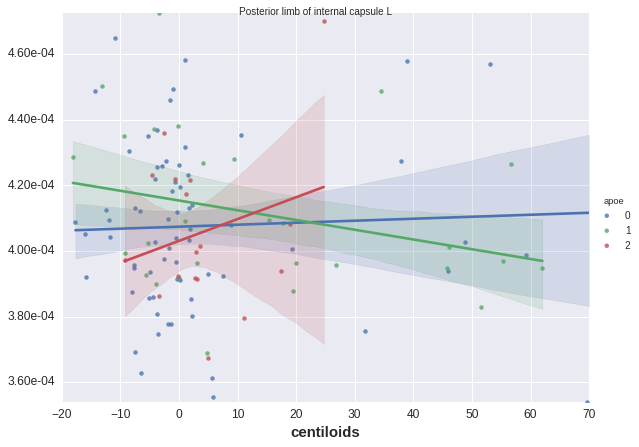

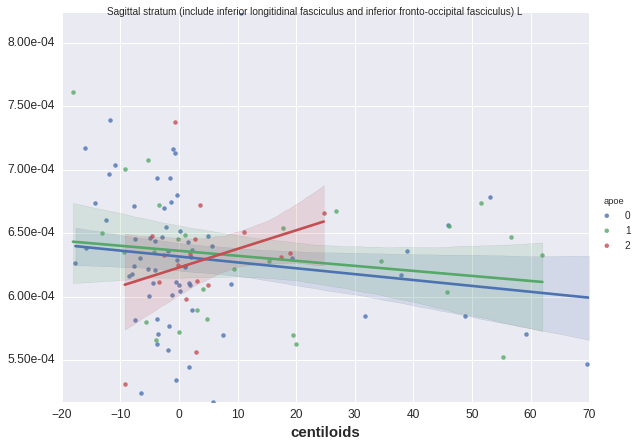

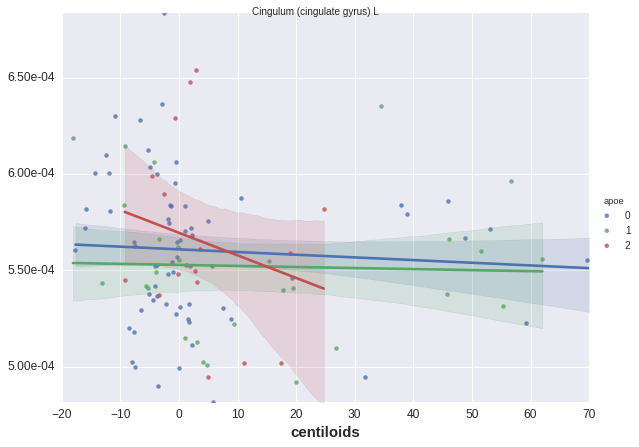

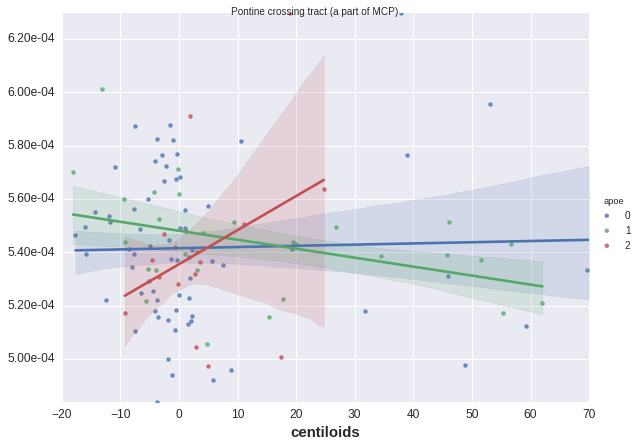

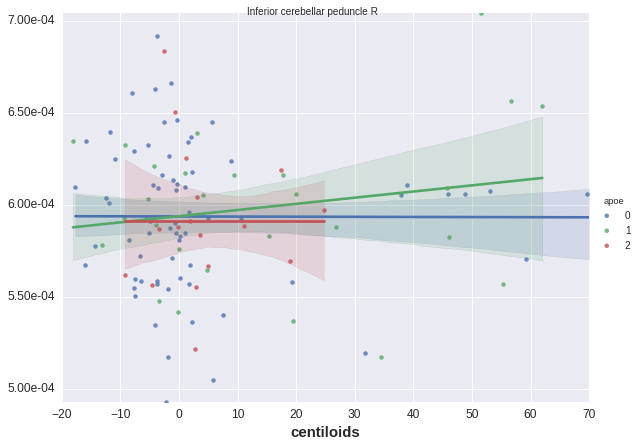

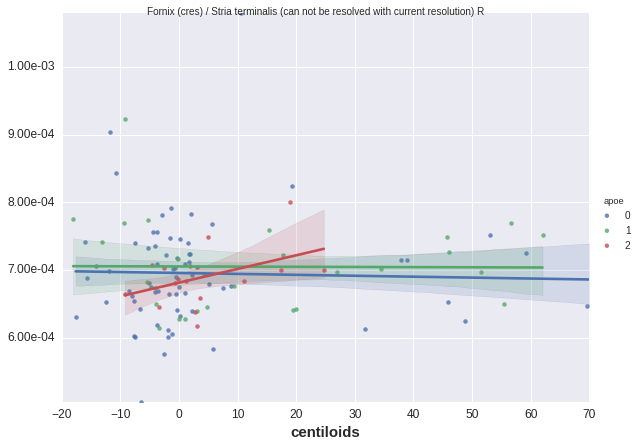

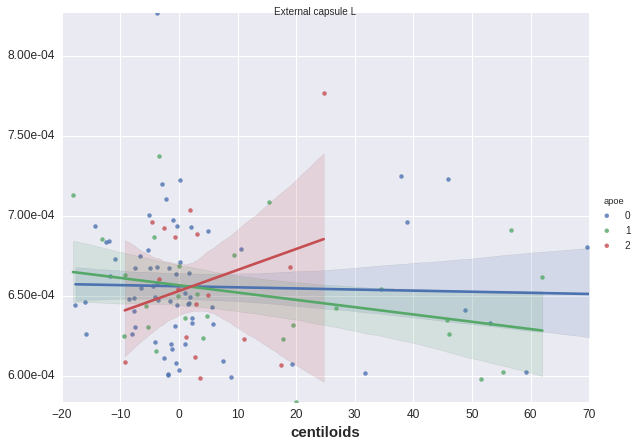

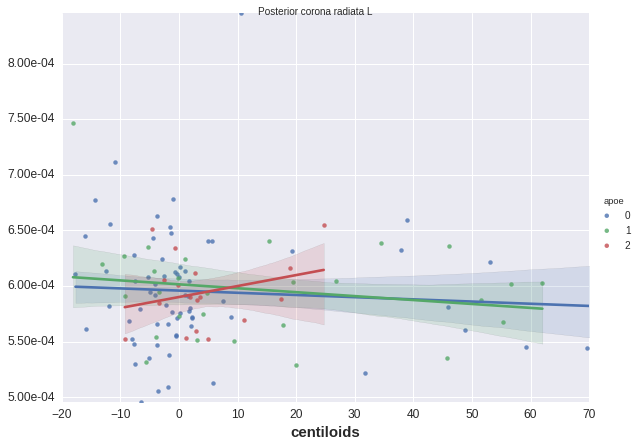

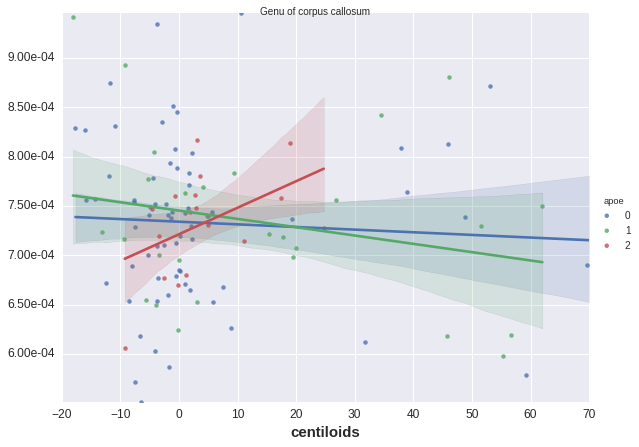

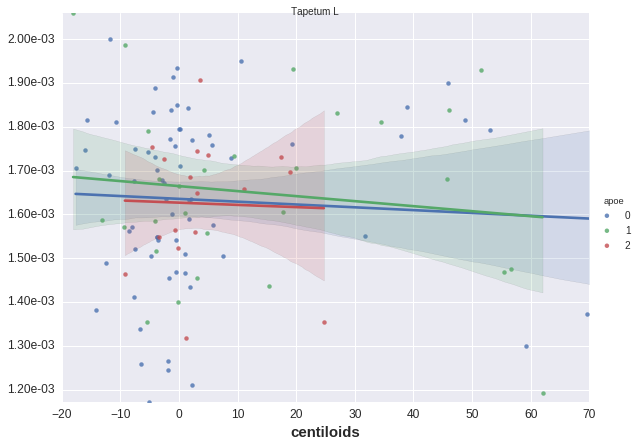

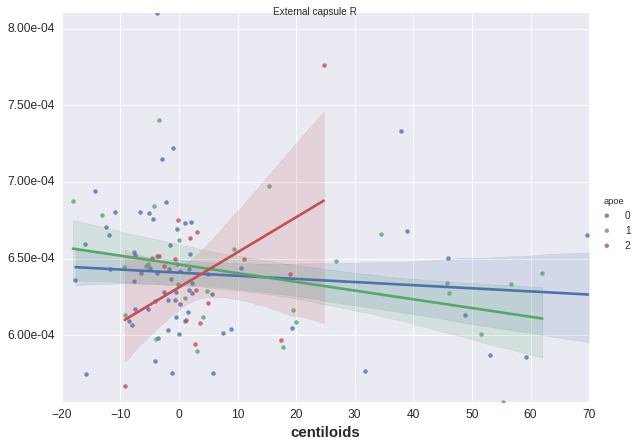

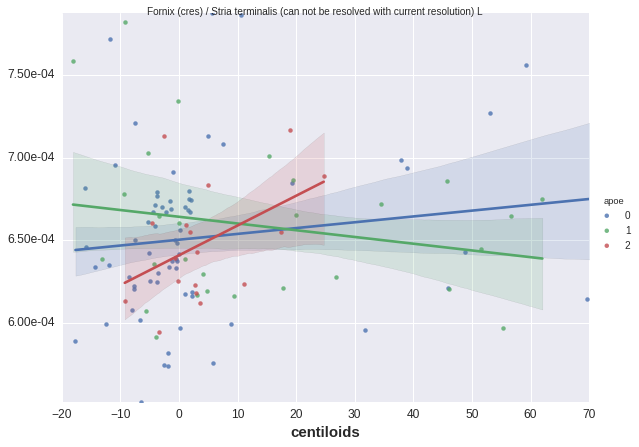

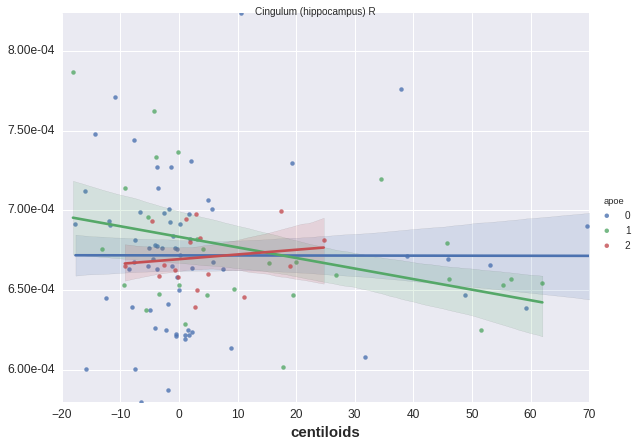

In [212]:
from roistats import plotting
reload(plotting)
data = pd.read_excel('/tmp/amylstaging_ICBM-labels-1mm_TBSS_roivalues_RD.xls').set_index('subject')
cov = pd.read_excel('/home/grg/SPM/2018/covariates.xlsx').set_index('subject')
data = data.join(cov)

for i, each in enumerate(set(data.columns).difference(set(cov.columns))):
    plotting.lm_plot(each, 'centiloids', data)

# Montage the graphs

In [26]:
wd = '/home/grg/jpg/'
import os
for i in xrange(48):
    cmd = 'montage %sfa%03d.jpg %smd%03d.jpg %sl1%03d.jpg %srd%03d.jpg -tile 4x -geometry +1+1 %stile%03d.jpg'%(wd,i,wd,i,wd,i,wd,i,wd,i)
    print cmd
    os.system(cmd)

montage /home/grg/jpg/fa000.jpg /home/grg/jpg/md000.jpg /home/grg/jpg/l1000.jpg /home/grg/jpg/rd000.jpg -tile 4x -geometry +1+1 /home/grg/jpg/tile000.jpg
montage /home/grg/jpg/fa001.jpg /home/grg/jpg/md001.jpg /home/grg/jpg/l1001.jpg /home/grg/jpg/rd001.jpg -tile 4x -geometry +1+1 /home/grg/jpg/tile001.jpg
montage /home/grg/jpg/fa002.jpg /home/grg/jpg/md002.jpg /home/grg/jpg/l1002.jpg /home/grg/jpg/rd002.jpg -tile 4x -geometry +1+1 /home/grg/jpg/tile002.jpg
montage /home/grg/jpg/fa003.jpg /home/grg/jpg/md003.jpg /home/grg/jpg/l1003.jpg /home/grg/jpg/rd003.jpg -tile 4x -geometry +1+1 /home/grg/jpg/tile003.jpg
montage /home/grg/jpg/fa004.jpg /home/grg/jpg/md004.jpg /home/grg/jpg/l1004.jpg /home/grg/jpg/rd004.jpg -tile 4x -geometry +1+1 /home/grg/jpg/tile004.jpg
montage /home/grg/jpg/fa005.jpg /home/grg/jpg/md005.jpg /home/grg/jpg/l1005.jpg /home/grg/jpg/rd005.jpg -tile 4x -geometry +1+1 /home/grg/jpg/tile005.jpg
montage /home/grg/jpg/fa006.jpg /home/grg/jpg/md006.jpg /home/grg/jpg/l1006.